<h1 style="font-size:40px;"><center> Walk Run Class</center></h1>
<hr style="height:1px;">

## Business Case

To create a Predictive model to classify whether the activity is walk or run based on the given features

<img src="https://i.ytimg.com/vi/MpViPSE-Hto/maxresdefault.jpg">

## Domain Analysis

According to the description of dataset from Kaggle the dataset contains a single file which represents 88588 sensor data samples collected from accelerometer and gyroscope from iPhone 5c in 10 seconds interval and ~5.4/second frequency. This data is represented by following columns (each column contains sensor data for one of the sensor's axes):

* acceleration_x
* acceleration_y
* acceleration_z
* gyro_x
* gyro_y
* gyro_z
<br>
There is an activity type represented by "activity" column which acts as label and reflects following activities:

* "0": walking
* "1": running\
\
Apart of that, the dataset contains "wrist" column which represents the wrist where the device was placed to collect a sample on:

* "0": left wrist
* "1": right wrist
<br>
Additionally, the dataset contains "date", "time" and "username" columns which provide information about the exact date, time and user which collected these measurements.




**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.dates as mdates

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from keras.models import Sequential
from keras.layers import LSTM,Dense

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("walkrun.csv")

In [3]:
data.head(10)

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
5,2017-6-30,13:51:17:46806991,viktor,0,0,0.4044,-0.8056,-0.0956,0.6925,-0.2179,2.5750
6,2017-6-30,13:51:17:246767997,viktor,0,0,0.6320,-1.1290,-0.2982,0.0548,-0.1896,0.4473
7,2017-6-30,13:51:17:446569025,viktor,0,0,0.6670,-1.3503,-0.0880,-0.8094,-0.7938,-1.4348
8,2017-6-30,13:51:17:646152973,viktor,0,0,0.2704,-0.8633,0.1293,-0.4173,-0.1904,-2.6759
9,2017-6-30,13:51:17:846502006,viktor,0,0,0.4690,-1.0740,0.0219,0.0388,1.1491,1.6982


In [4]:
data.tail()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755
88587,2017-7-9,20:9:16:117410004,viktor,0,0,0.3140,-0.8008,-0.0911,0.1183,1.0850,1.2814


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
wrist,88588.0,0.522170,0.499511,0.0000,0.000000,1.0000,1.000000,1.0000
activity,88588.0,0.500801,0.500002,0.0000,0.000000,1.0000,1.000000,1.0000
acceleration_x,88588.0,-0.074811,1.009299,-5.3505,-0.381800,-0.0595,0.355500,5.6033
acceleration_y,88588.0,-0.562585,0.658458,-3.2990,-1.033500,-0.7591,-0.241775,2.6680
acceleration_z,88588.0,-0.313956,0.486815,-3.7538,-0.376000,-0.2210,-0.085900,1.6403
gyro_x,88588.0,0.004160,1.253423,-4.4306,-0.920700,0.0187,0.888800,4.8742
gyro_y,88588.0,0.037203,1.198725,-7.4647,-0.644825,0.0393,0.733700,8.4980
gyro_z,88588.0,0.022327,1.914423,-9.4800,-1.345125,0.0069,1.398200,11.2662


## Exploratory Data Analysis

### Univarient Analysis

In [7]:
df = pd.DataFrame(data=data.iloc[:,5:11])
df['activity'] = data['activity']
df['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
df['time'] = pd.to_datetime(data['time'], format='%H:%M:%S:%f') 


In [8]:
df.head(2)

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,activity,date,time
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0,2017-06-30,1900-01-01 13:51:15.847724020
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,0,2017-06-30,1900-01-01 13:51:16.246945023


In [9]:
df['datetime'] = pd.to_datetime(df['date']) + pd.to_timedelta(df['time'].dt.strftime('%H:%M:%S.%f'))
df['datetime'] = pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S:%f')
df.drop(columns=['date','time'],inplace=True)

In [10]:
df

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,activity,datetime
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296,0,2017-06-30 13:51:15.847724
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269,0,2017-06-30 13:51:16.246945
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367,0,2017-06-30 13:51:16.446233
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336,0,2017-06-30 13:51:16.646117
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922,0,2017-06-30 13:51:16.846738
...,...,...,...,...,...,...,...,...
88583,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048,0,2017-07-09 20:09:15.317911
88584,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761,0,2017-07-09 20:09:15.517889
88585,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616,0,2017-07-09 20:09:15.717828
88586,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755,0,2017-07-09 20:09:15.917932


In [11]:
df.set_index('datetime',inplace=True)

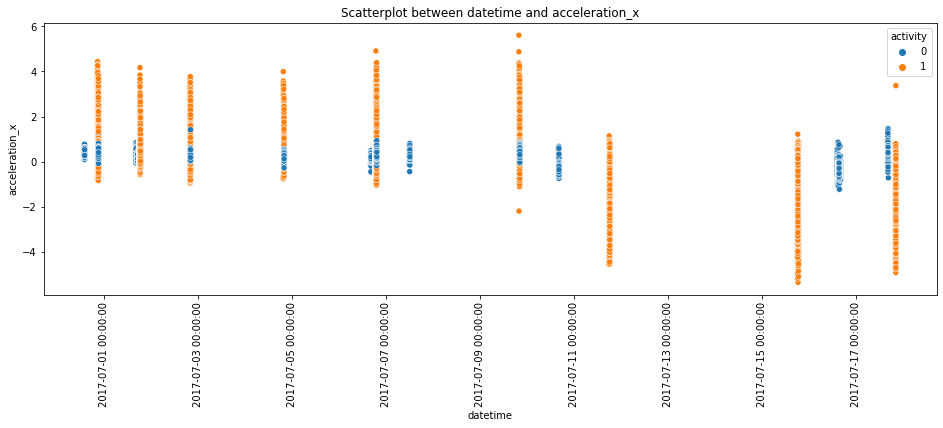

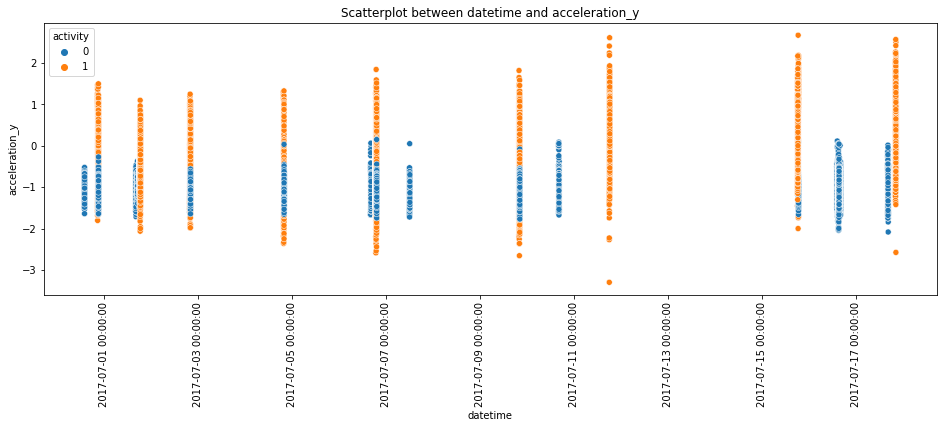

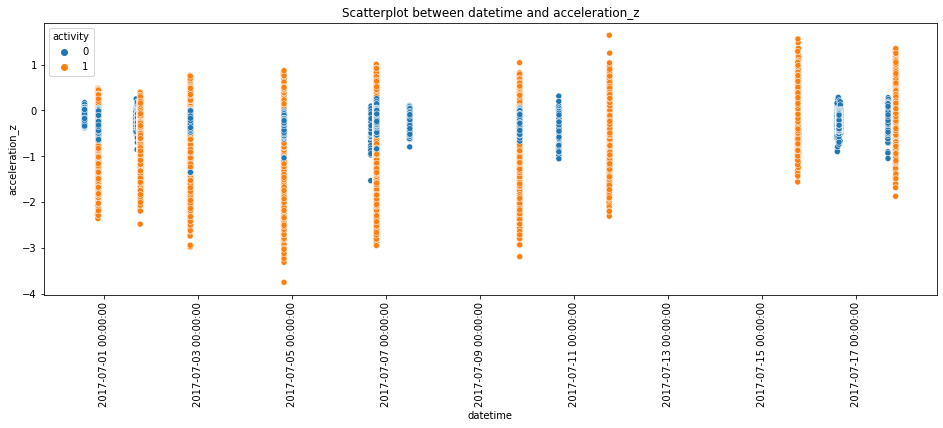

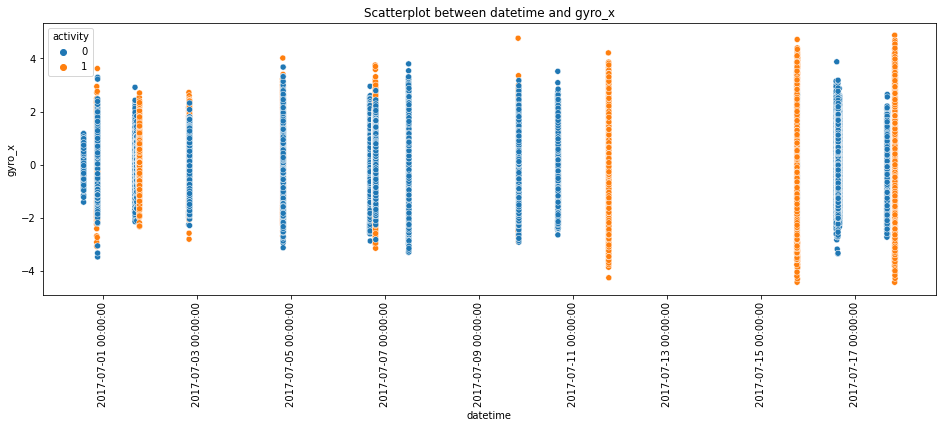

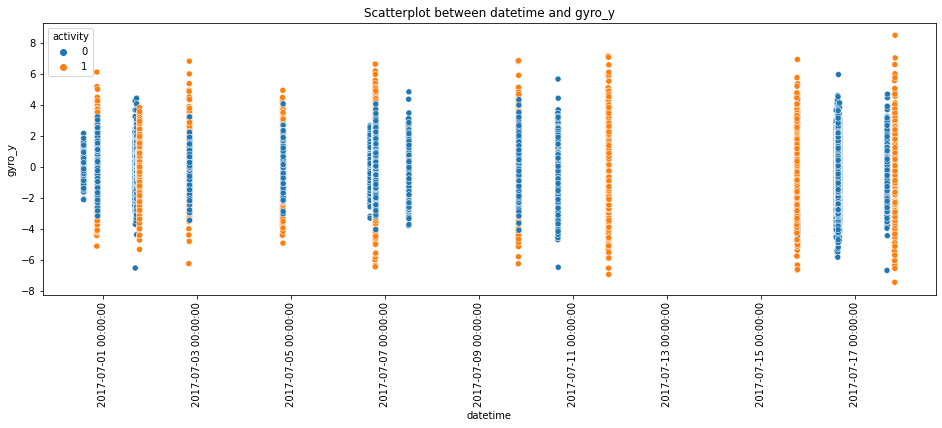

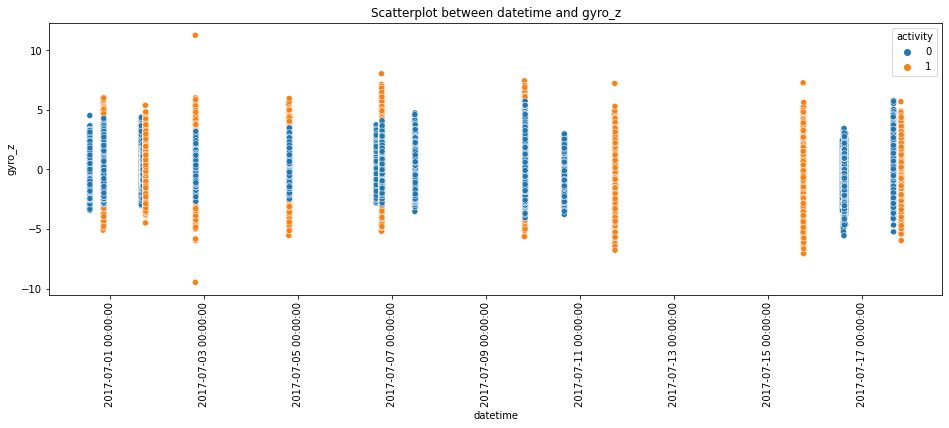

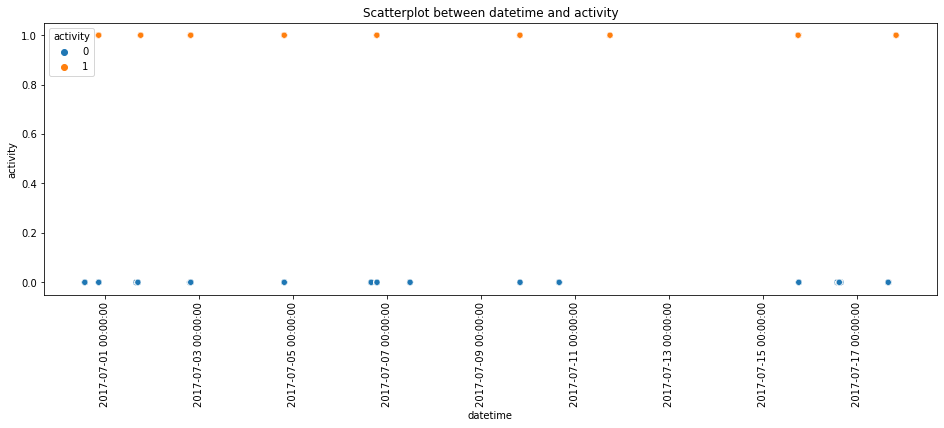

In [12]:
for col in df:
    plt.figure(figsize=(16,5))
    sns.scatterplot(x=df.index,y=df[col],hue=df['activity'])
    # Set x-axis major formatter to include both date and time
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
    plt.xticks(rotation='vertical')
    plt.title(f"Scatterplot between datetime and {col}")
    plt.show()

In [13]:
discrete_col = ['wrist','activity']
continuous_col = ['acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']

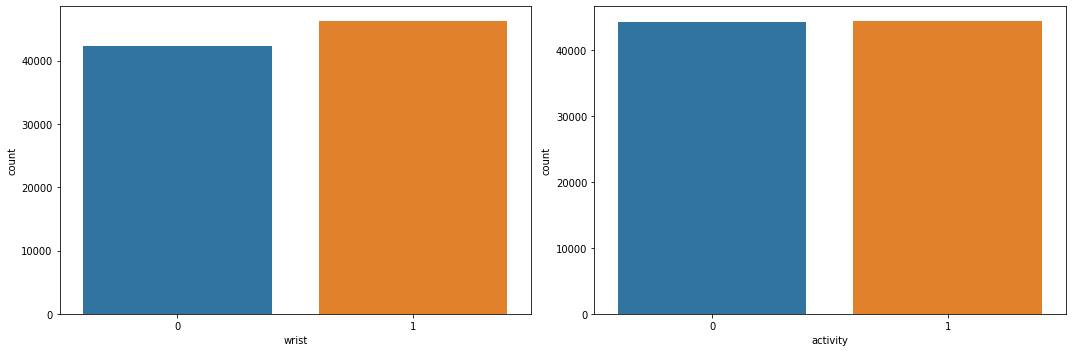

In [14]:
plt.figure(figsize=(15,5))

pltnum = 1

for col in discrete_col:
    if pltnum <= 2:
        ax = plt.subplot(1,2,pltnum)
        sns.countplot(x=data[col])
        pltnum += 1
        
plt.tight_layout()
plt.show()

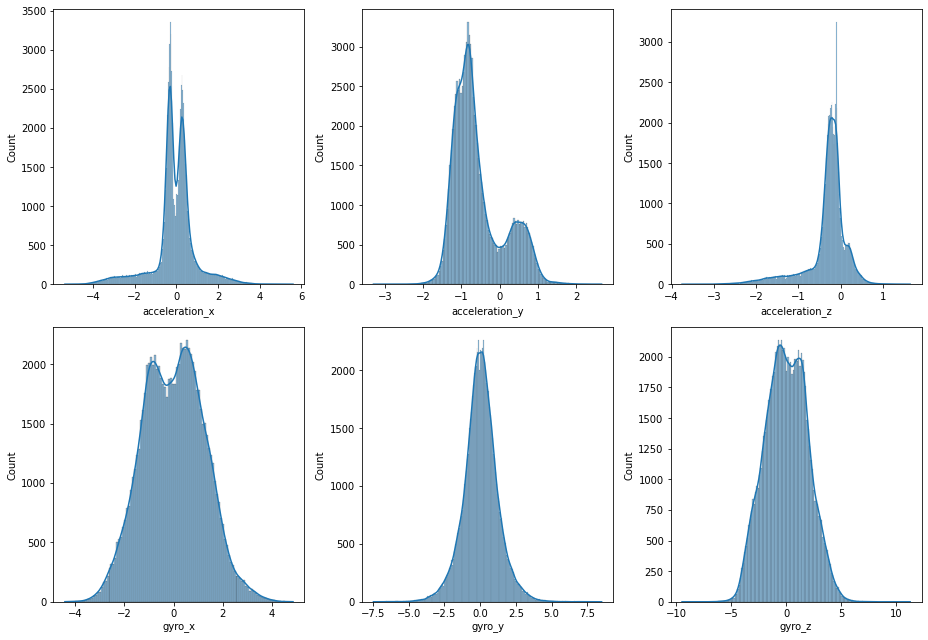

In [15]:
plt.figure(figsize=(13,9))

pltnum=1
for col in continuous_col:
        if pltnum <=6:
            ax = plt.subplot(2,3,pltnum)
            sns.histplot(x=data[col],kde=True)
            pltnum += 1
plt.tight_layout()
plt.show()

#### <ins>*Insights*</ins>

* Activity have a `balanced dataset`
* More people wear the device on `Right wrist`
* gyro_y have a `normal distribution`
* Most values on acceleration_x is between `-1 and 0`
* Most values on acceleration_y is between `-2 and 0`
* Acceleration_z have a slight `Negative skewness`
* gyro_x and gyro_z is not a perfect distriution but follows `Empirical Rule`

### Bivarient Analysis

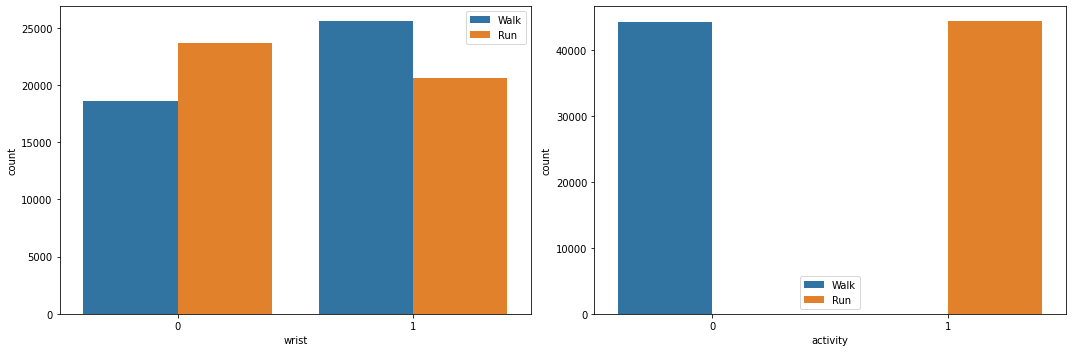

In [16]:
plt.figure(figsize=(15,5))

pltnum = 1

for col in discrete_col:
    if pltnum <= 2:
        ax = plt.subplot(1,2,pltnum)
        sns.countplot(x=data[col],hue=data['activity'])
        plt.legend(labels=['Walk', 'Run'])
        pltnum += 1
        
plt.tight_layout()
plt.show()

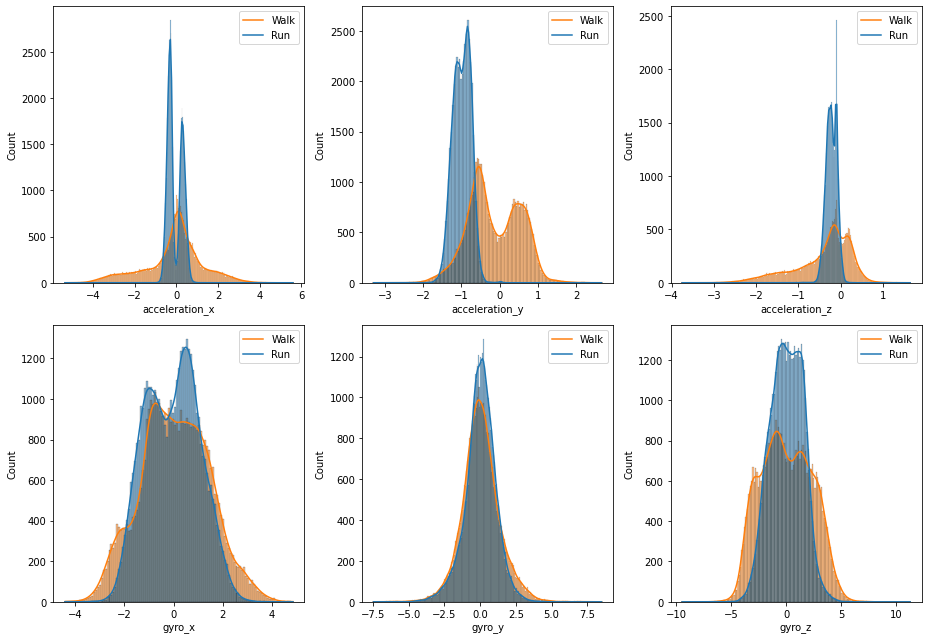

In [17]:
plt.figure(figsize=(13,9))

pltnum=1
for col in continuous_col:
        if pltnum <=6:
            ax = plt.subplot(2,3,pltnum)
            sns.histplot(x=data[col],kde=True,hue=data["activity"])
            plt.legend(labels=['Walk', 'Run'])
            pltnum += 1
plt.tight_layout()
plt.show()

### Insights

* acceleration_x: The distribution for Walk is wider and more spread out than Run, indicating greater variability in acceleration during walking.
* acceleration_y: The distributions for Walk and Run are more similar, with a slight overlap.
* acceleration_z: The distribution for Run is wider than Walk, suggesting more variable acceleration in the vertical direction while running.
* gyro_x: The distributions are distinct, with Walk having a wider spread and Run exhibiting a sharper peak.
* gyro_y: The distributions are more overlapping, but Run appears to have a slightly wider spread.
* gyro_z: The distributions are similar, with a slight overlap favoring Walk.


The distributions of some variables (e.g., acceleration_x, gyro_x) show clear differences between Walk and Run activities.
Other variables (e.g., acceleration_y, gyro_z) exhibit more overlap, suggesting less distinction in movement patterns.
The wider distributions generally observed for Walk might indicate less consistent movement patterns compared to Run.


<Figure size 1080x1080 with 0 Axes>

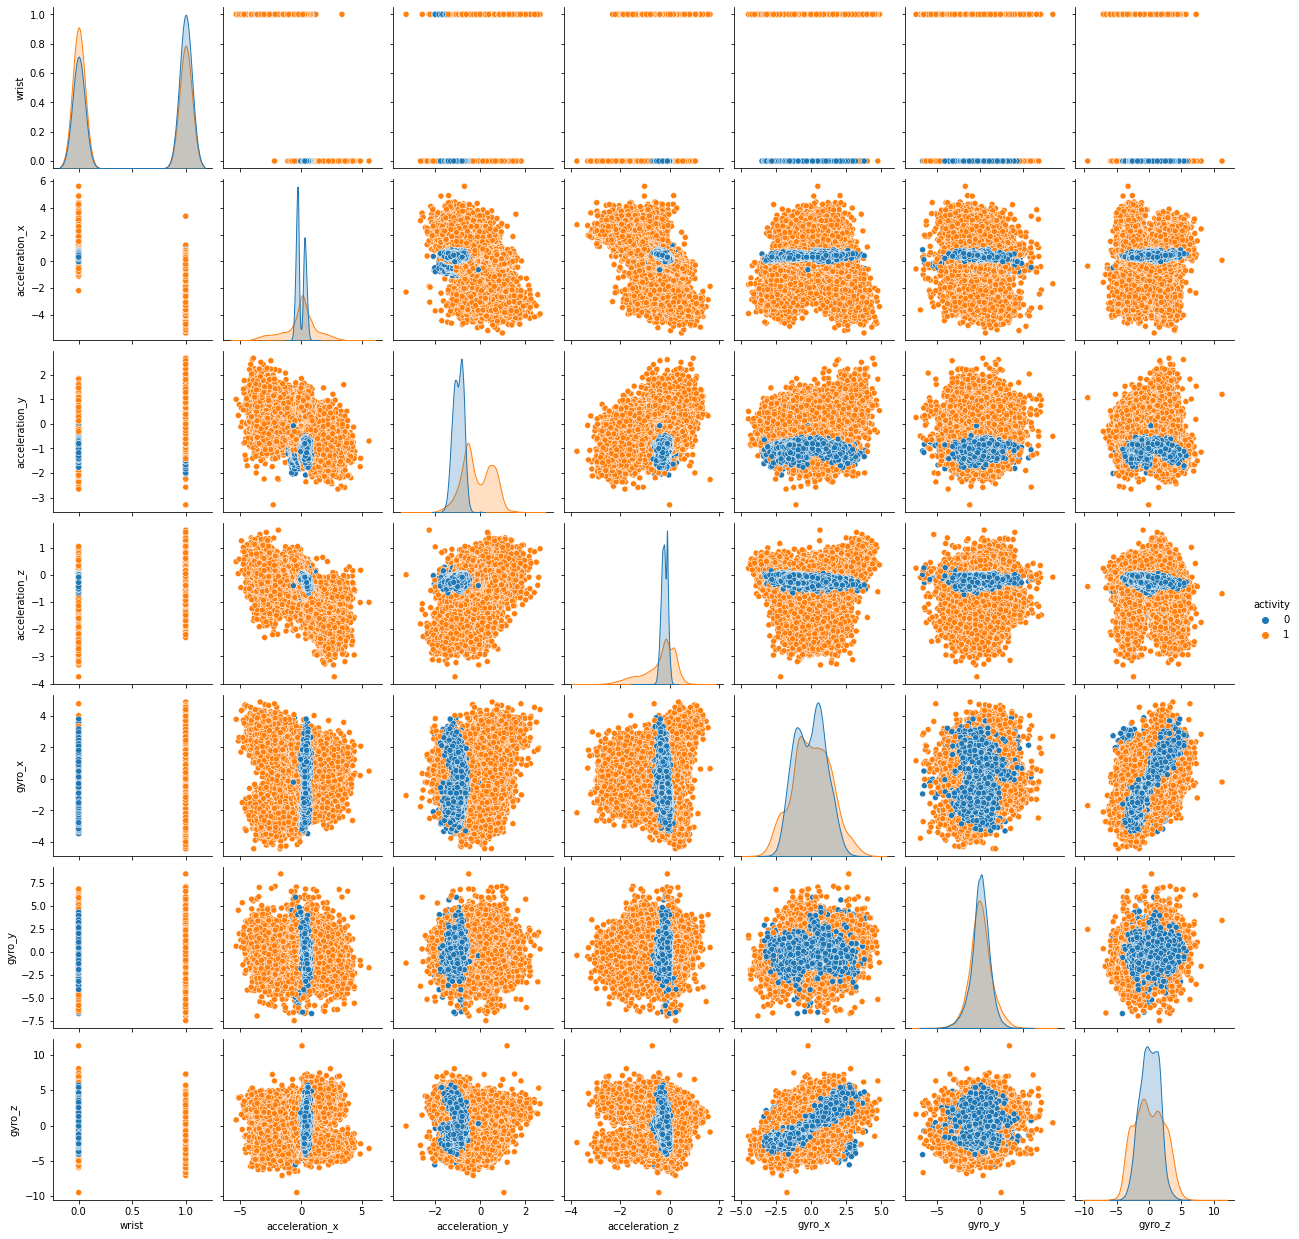

In [18]:
plt.figure(figsize=(15,15))

sns.pairplot(data,hue="activity")

plt.show()

### Data Preprocessing

In [19]:
print(data.isnull().sum()/len(data)*100)

date              0.0
time              0.0
username          0.0
wrist             0.0
activity          0.0
acceleration_x    0.0
acceleration_y    0.0
acceleration_z    0.0
gyro_x            0.0
gyro_y            0.0
gyro_z            0.0
dtype: float64


In [20]:
len(data)

88588

No missing Value to handle

As the features `date`,`time`, `username`(which is a constant), and `wrist` are irrelavent for this dataset, we can drop them.

In [21]:
data.drop(columns=['date','time','username','wrist'],inplace=True)

In [22]:
data

,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...
88583,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


* **No relevant categorical features present, so no encoding needed** 

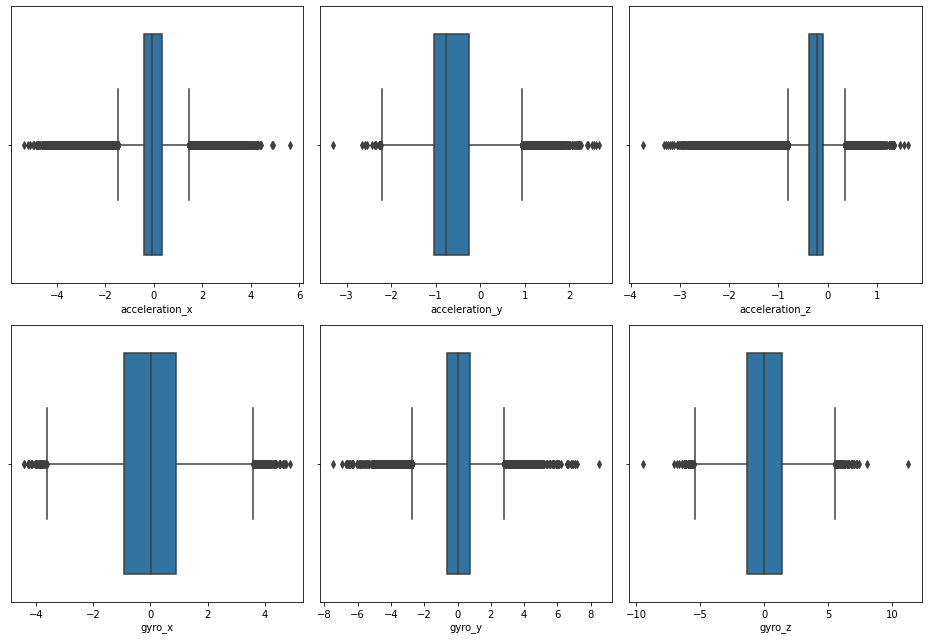

In [23]:
plt.figure(figsize=(13,9))

pltnum=1
for col in continuous_col:
        if pltnum <=6:
            ax = plt.subplot(2,3,pltnum)
            sns.boxplot(x=data[col])
#             plt.legend(labels=['Walk', 'Run'])
            pltnum += 1
plt.tight_layout()
plt.show()

In [24]:
for col in continuous_col:
    IQR = stats.iqr(data[col],interpolation='midpoint')
    
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    min_limit = Q1 - 1.5*IQR
    max_limit = Q3 + 1.5*IQR    
    
    data.loc[data[col]<min_limit,col] = np.median(data[col])
    data.loc[data[col]>max_limit,col] = np.median(data[col])    

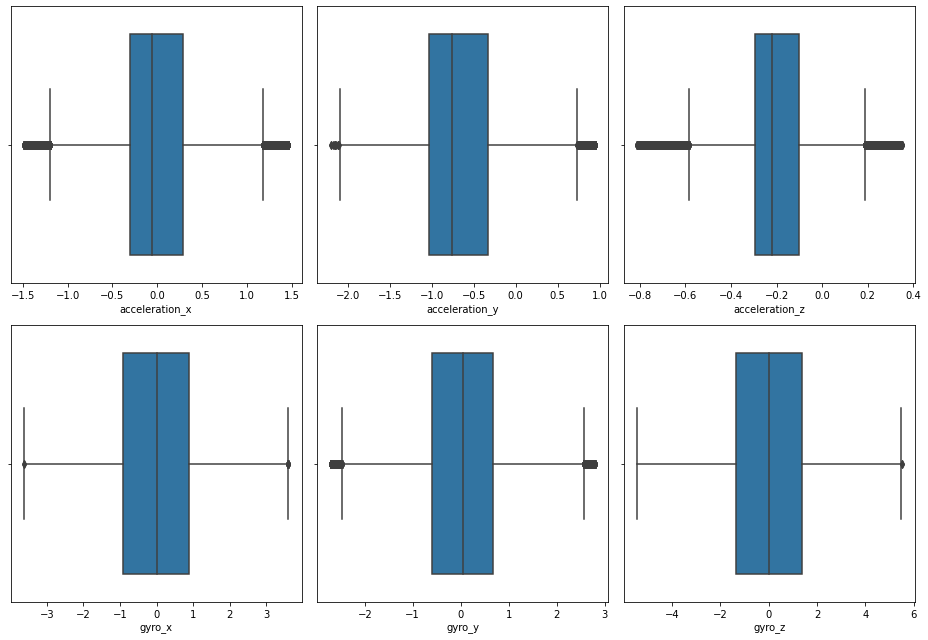

In [25]:
plt.figure(figsize=(13,9))

pltnum=1
for col in continuous_col:
        if pltnum <=6:
            ax = plt.subplot(2,3,pltnum)
            sns.boxplot(x=data[col])
#             plt.legend(labels=['Walk', 'Run'])
            pltnum += 1
plt.tight_layout()
plt.show()

* We can use SimpleImputer method from sklearn.impute to impute the outliers.


## Feature Selection

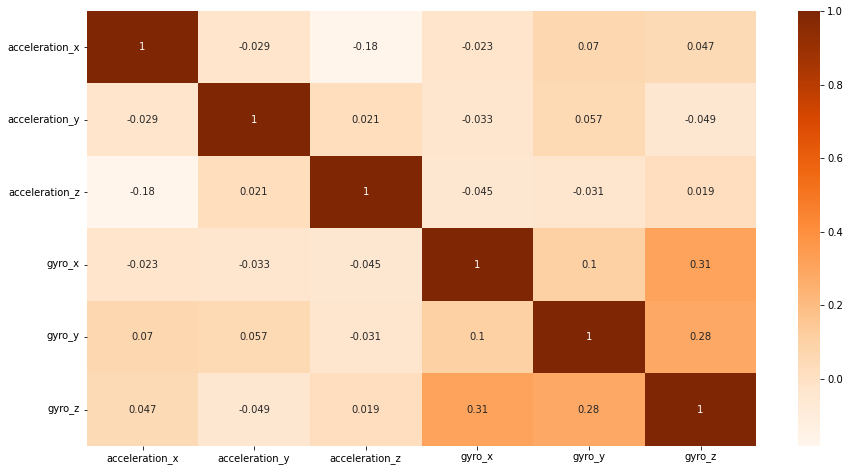

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(data.drop(columns=['activity']).corr(),annot=True,cmap='Oranges')
plt.show()

## Model Creation

In [27]:
X = data.drop(columns=['activity'])
y = data['activity']

In [28]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
X_train.shape, X_test.shape


((70870, 6), (17718, 6))

In [29]:
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true,predicted)
    f1 = f1_score(true,predicted)
    precision = precision_score(true,predicted)
    recall = recall_score(true,predicted)
    
    return accuracy,f1,precision, recall

In [30]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN':KNeighborsClassifier(n_jobs=-1),
#     'SVC': SVC(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost' : AdaBoostClassifier(),
    'GradientBoost' : GradientBoostingClassifier(),
    'XGBClassifier' : XGBClassifier(),
    'CatBoostClassifier' : CatBoostClassifier(),
    'LightGBMClassifier' : LGBMClassifier(),
    'MLPClassifier' : MLPClassifier()
        
}

In [31]:
params={
        "Decision Tree": {
            'criterion':["gini", "entropy", "log_loss"],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        },
        "Random Forest":{
            'criterion':["gini", "entropy", "log_loss"],
            'n_estimators': [50, 100, 200], 
            'max_depth': [None, 10, 20, 30], 
            'min_samples_split': [2, 5, 10]
        },
#         "SVC":{
#             'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
#             'kernel': ['linear', 'poly', 'rbf','sigmoid'],
#             'C': [0.001, 0.01, 0.1, 1, 10, 100]
#         },
        "Logistic Regression":{
            'C': [0.001, 0.01, 0.1, 1, 10, 100], 
            'penalty': ['l1', 'l2']
        },
        "KNN":{
            'n_neighbors': [3, 5, 7, 9], 
            'weights': ['uniform', 'distance'],
            'algorithm':['ball_tree','kd_tree','brute']
        },
        "GradientBoost":{
            'n_estimators': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 1], 
            'max_depth': [3, 5, 7]
        },
        "XGBClassifier":{
            'learning_rate':[.1,.01,.05,.001],
            'n_estimators': [8,16,32,64,128,256]
        },
        "CatBoostClassifier":{
            'iterations': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 1], 
            'depth': [4, 6, 8]
        },
        "AdaBoost":{
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        },
        "LightGBMClassifier":{
            'n_estimators': [50, 100, 200], 
            'learning_rate': [0.01, 0.1, 1], 
            'max_depth': [3, 5, 7]
           },
        "MLPClassifier" : {
            'hidden_layer_sizes': [(50,), (100,), (50, 50)],
            'alpha': [0.0001, 0.001, 0.01]
        }

}


In [32]:
def hyper_tuning(model_name,model):
        para = params[model_name]

        gs = GridSearchCV(model,para,cv=5,n_jobs=-1)
        gs.fit(X_train,y_train)
        
        model.set_params(**gs.best_params_)
        run_model(model_name,model)
        

In [33]:
model_list = []
accuracy_list_train = []
accuracy_list_test = []
f1_list_train = []
f1_list_test = []
roc_auc_list = []

def run_model(model_name, model):

    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    # Evaluate Train and Test dataset
    model_train_accuracy, model_train_f1, model_train_precision, model_train_recall = evaluate_model(
        y_train, y_train_pred)
    model_test_accuracy, model_test_f1, model_test_precision, model_test_recall = evaluate_model(
        y_test, y_test_pred)

    cross_val_mean = cross_val_score(model, X_train, y_train, cv=5).mean()
    cross_val_std = cross_val_score(model, X_train, y_train, cv=5).std()

    print(model_name)
    model_list.append(model_name)

    print('Model performance for Training set')
    print("- Accuracy : {:.4f}".format(model_train_accuracy))
    print("- F1_score : {:.4f}".format(model_train_f1))
    print("- Precision Score: {:.4f}".format(model_train_precision))
    print("- Recall Score: {:.4f}".format(model_train_recall))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1_score: {:.4f}".format(model_test_f1))
    print("- Precision Score: {:.4f}".format(model_test_precision))
    print("- Recall Score: {:.4f}".format(model_test_recall))

    print('----------------------------------')

    print("Crossvalidate Score(mean): {:.4f}".format(cross_val_mean))
    print("Crossvalidate Std: {:.4f}".format(cross_val_std))

#     if model_name not in model_list:
    accuracy_list_train.append(model_train_accuracy)
    accuracy_list_test.append(model_test_accuracy)

    f1_list_train.append(model_train_f1)
    f1_list_test.append(model_test_f1)

    roc_auc_list.append(roc_auc)  

    print('=' * 35)


#     print('\n')

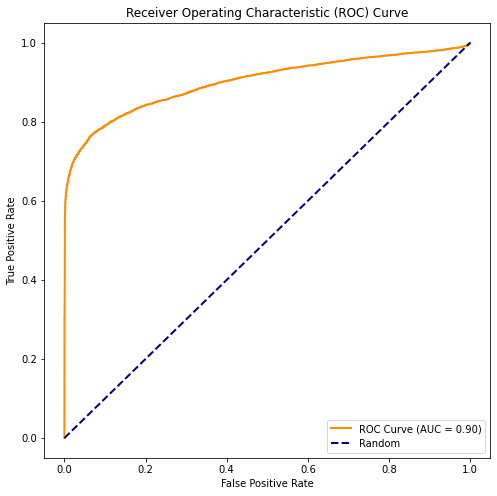

Logistic Regression
Model performance for Training set
- Accuracy : 0.8403
- F1_score : 0.8332
- Precision Score: 0.8754
- Recall Score: 0.7949
----------------------------------
Model performance for Test set
- Accuracy: 0.8434
- F1_score: 0.8347
- Precision Score: 0.8780
- Recall Score: 0.7955
----------------------------------
Crossvalidate Score(mean): 0.8401
Crossvalidate Std: 0.0029


In [34]:
run_model('Logistic Regression',LogisticRegression())

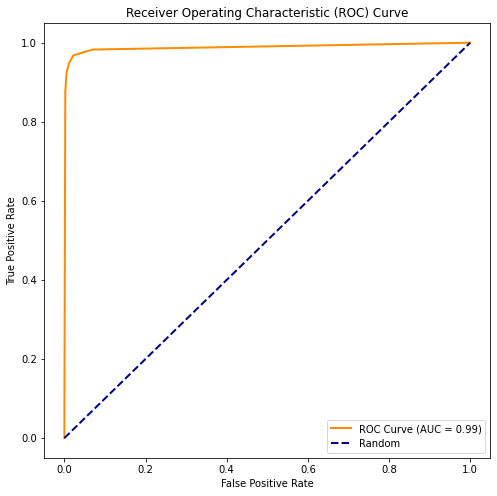

KNN
Model performance for Training set
- Accuracy : 0.9768
- F1_score : 0.9765
- Precision Score: 0.9919
- Recall Score: 0.9616
----------------------------------
Model performance for Test set
- Accuracy: 0.9685
- F1_score: 0.9676
- Precision Score: 0.9883
- Recall Score: 0.9478
----------------------------------
Crossvalidate Score(mean): 0.9675
Crossvalidate Std: 0.0016


In [35]:
run_model('KNN',KNeighborsClassifier()) # without hyperparametric tuning better value

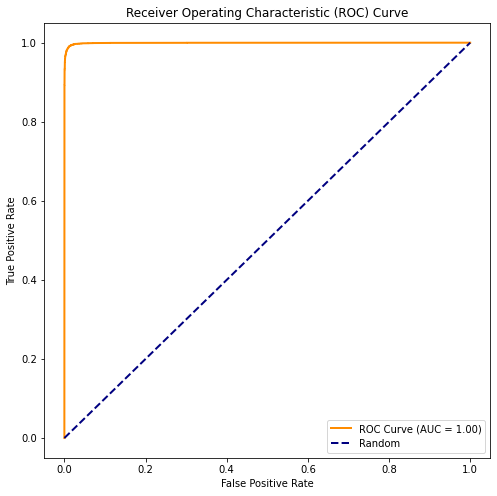

XGBClassifier
Model performance for Training set
- Accuracy : 0.9976
- F1_score : 0.9976
- Precision Score: 0.9986
- Recall Score: 0.9966
----------------------------------
Model performance for Test set
- Accuracy: 0.9891
- F1_score: 0.9890
- Precision Score: 0.9890
- Recall Score: 0.9891
----------------------------------
Crossvalidate Score(mean): 0.9891
Crossvalidate Std: 0.0010


In [36]:
run_model('XGBClassifier',XGBClassifier())

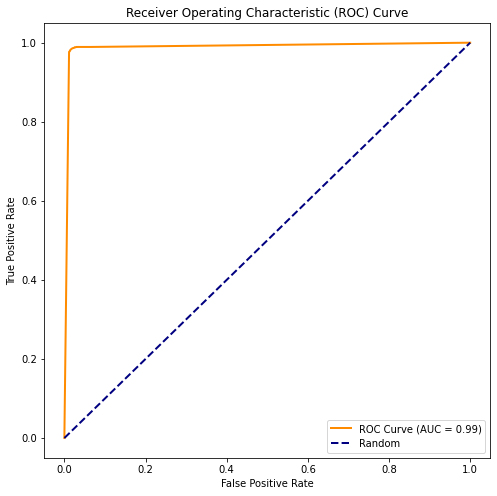

Decision Tree
Model performance for Training set
- Accuracy : 0.9953
- F1_score : 0.9954
- Precision Score: 0.9966
- Recall Score: 0.9941
----------------------------------
Model performance for Test set
- Accuracy: 0.9834
- F1_score: 0.9833
- Precision Score: 0.9830
- Recall Score: 0.9836
----------------------------------
Crossvalidate Score(mean): 0.9812
Crossvalidate Std: 0.0008


In [37]:
hyper_tuning('Decision Tree',DecisionTreeClassifier()) # with hyperparametric tuning better value

[LightGBM] [Info] Number of positive: 35560, number of negative: 35310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 70870, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501764 -> initscore=0.007055
[LightGBM] [Info] Start training from score 0.007055


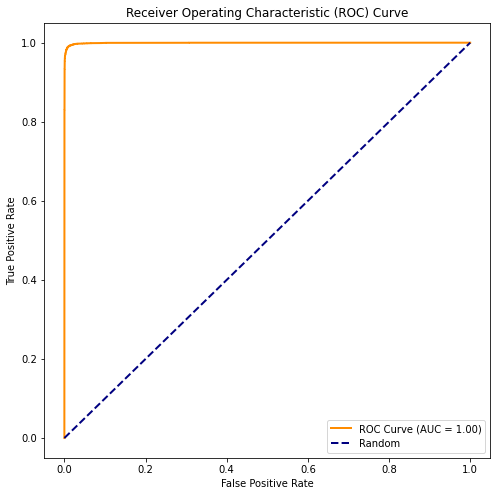

[LightGBM] [Info] Number of positive: 28448, number of negative: 28248
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 56696, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501764 -> initscore=0.007055
[LightGBM] [Info] Start training from score 0.007055
[LightGBM] [Info] Number of positive: 28448, number of negative: 28248
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 56696, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501764 -> initscore=0.007055
[LightGBM] [Info] Start training from score 0.007055
[LightGBM] [Info] 

In [38]:
run_model('LightGBMClassifier',LGBMClassifier())

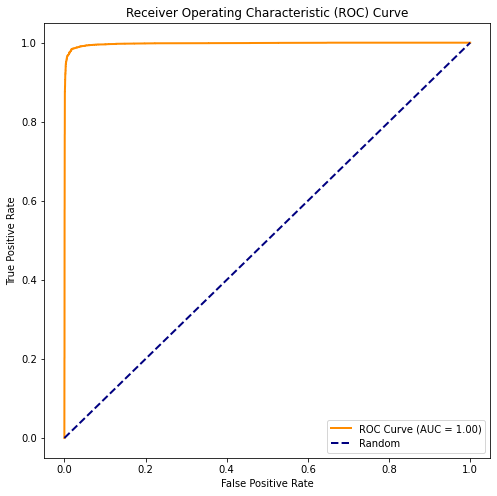

GradientBoost
Model performance for Training set
- Accuracy : 0.9812
- F1_score : 0.9811
- Precision Score: 0.9877
- Recall Score: 0.9746
----------------------------------
Model performance for Test set
- Accuracy: 0.9809
- F1_score: 0.9807
- Precision Score: 0.9876
- Recall Score: 0.9739
----------------------------------
Crossvalidate Score(mean): 0.9793
Crossvalidate Std: 0.0011


In [39]:
run_model('GradientBoost',GradientBoostingClassifier())

Learning rate set to 0.063545
0:	learn: 0.6015472	total: 150ms	remaining: 2m 30s
1:	learn: 0.5261900	total: 161ms	remaining: 1m 20s
2:	learn: 0.4732424	total: 174ms	remaining: 58s
3:	learn: 0.4279167	total: 186ms	remaining: 46.2s
4:	learn: 0.3935936	total: 197ms	remaining: 39.2s
5:	learn: 0.3522514	total: 209ms	remaining: 34.6s
6:	learn: 0.3283993	total: 222ms	remaining: 31.5s
7:	learn: 0.2969616	total: 234ms	remaining: 29s
8:	learn: 0.2682767	total: 245ms	remaining: 27s
9:	learn: 0.2486734	total: 256ms	remaining: 25.4s
10:	learn: 0.2312510	total: 268ms	remaining: 24.1s
11:	learn: 0.2194756	total: 278ms	remaining: 22.9s
12:	learn: 0.2096106	total: 289ms	remaining: 21.9s
13:	learn: 0.1988390	total: 299ms	remaining: 21.1s
14:	learn: 0.1907296	total: 310ms	remaining: 20.4s
15:	learn: 0.1787984	total: 322ms	remaining: 19.8s
16:	learn: 0.1704226	total: 332ms	remaining: 19.2s
17:	learn: 0.1640870	total: 342ms	remaining: 18.7s
18:	learn: 0.1569954	total: 354ms	remaining: 18.3s
19:	learn: 0.15

170:	learn: 0.0347928	total: 2.07s	remaining: 10s
171:	learn: 0.0347244	total: 2.08s	remaining: 10s
172:	learn: 0.0346521	total: 2.09s	remaining: 10s
173:	learn: 0.0344022	total: 2.11s	remaining: 10s
174:	learn: 0.0342967	total: 2.12s	remaining: 9.99s
175:	learn: 0.0341103	total: 2.13s	remaining: 9.98s
176:	learn: 0.0340346	total: 2.14s	remaining: 9.97s
177:	learn: 0.0337734	total: 2.15s	remaining: 9.95s
178:	learn: 0.0337162	total: 2.17s	remaining: 9.94s
179:	learn: 0.0335210	total: 2.18s	remaining: 9.93s
180:	learn: 0.0334282	total: 2.19s	remaining: 9.91s
181:	learn: 0.0333758	total: 2.2s	remaining: 9.88s
182:	learn: 0.0331445	total: 2.21s	remaining: 9.86s
183:	learn: 0.0330910	total: 2.22s	remaining: 9.84s
184:	learn: 0.0329486	total: 2.23s	remaining: 9.81s
185:	learn: 0.0329010	total: 2.24s	remaining: 9.79s
186:	learn: 0.0327089	total: 2.25s	remaining: 9.77s
187:	learn: 0.0326164	total: 2.26s	remaining: 9.75s
188:	learn: 0.0324539	total: 2.27s	remaining: 9.73s
189:	learn: 0.0323999

347:	learn: 0.0236678	total: 3.97s	remaining: 7.43s
348:	learn: 0.0236294	total: 3.98s	remaining: 7.42s
349:	learn: 0.0236083	total: 3.99s	remaining: 7.41s
350:	learn: 0.0235934	total: 4s	remaining: 7.4s
351:	learn: 0.0235782	total: 4.01s	remaining: 7.39s
352:	learn: 0.0235341	total: 4.03s	remaining: 7.38s
353:	learn: 0.0235031	total: 4.04s	remaining: 7.37s
354:	learn: 0.0234668	total: 4.05s	remaining: 7.36s
355:	learn: 0.0234506	total: 4.06s	remaining: 7.34s
356:	learn: 0.0233820	total: 4.07s	remaining: 7.33s
357:	learn: 0.0233545	total: 4.08s	remaining: 7.32s
358:	learn: 0.0233168	total: 4.09s	remaining: 7.3s
359:	learn: 0.0233023	total: 4.1s	remaining: 7.29s
360:	learn: 0.0232795	total: 4.11s	remaining: 7.28s
361:	learn: 0.0232478	total: 4.12s	remaining: 7.26s
362:	learn: 0.0232322	total: 4.13s	remaining: 7.25s
363:	learn: 0.0232228	total: 4.14s	remaining: 7.24s
364:	learn: 0.0231914	total: 4.15s	remaining: 7.22s
365:	learn: 0.0231786	total: 4.16s	remaining: 7.21s
366:	learn: 0.0231

522:	learn: 0.0195083	total: 5.86s	remaining: 5.34s
523:	learn: 0.0195083	total: 5.87s	remaining: 5.33s
524:	learn: 0.0195083	total: 5.88s	remaining: 5.32s
525:	learn: 0.0195083	total: 5.89s	remaining: 5.3s
526:	learn: 0.0194743	total: 5.9s	remaining: 5.29s
527:	learn: 0.0194743	total: 5.91s	remaining: 5.28s
528:	learn: 0.0194579	total: 5.92s	remaining: 5.27s
529:	learn: 0.0194391	total: 5.93s	remaining: 5.26s
530:	learn: 0.0194206	total: 5.94s	remaining: 5.25s
531:	learn: 0.0193886	total: 5.96s	remaining: 5.24s
532:	learn: 0.0193452	total: 5.97s	remaining: 5.23s
533:	learn: 0.0192969	total: 5.98s	remaining: 5.22s
534:	learn: 0.0192726	total: 5.99s	remaining: 5.21s
535:	learn: 0.0192726	total: 6s	remaining: 5.19s
536:	learn: 0.0192726	total: 6.01s	remaining: 5.18s
537:	learn: 0.0192580	total: 6.02s	remaining: 5.17s
538:	learn: 0.0192331	total: 6.03s	remaining: 5.16s
539:	learn: 0.0192132	total: 6.04s	remaining: 5.14s
540:	learn: 0.0191734	total: 6.05s	remaining: 5.13s
541:	learn: 0.019

688:	learn: 0.0180233	total: 7.55s	remaining: 3.41s
689:	learn: 0.0180233	total: 7.56s	remaining: 3.4s
690:	learn: 0.0180233	total: 7.57s	remaining: 3.38s
691:	learn: 0.0180233	total: 7.58s	remaining: 3.37s
692:	learn: 0.0180233	total: 7.58s	remaining: 3.36s
693:	learn: 0.0180233	total: 7.59s	remaining: 3.35s
694:	learn: 0.0180233	total: 7.6s	remaining: 3.33s
695:	learn: 0.0180233	total: 7.61s	remaining: 3.32s
696:	learn: 0.0180233	total: 7.62s	remaining: 3.31s
697:	learn: 0.0180233	total: 7.62s	remaining: 3.3s
698:	learn: 0.0180232	total: 7.63s	remaining: 3.29s
699:	learn: 0.0180232	total: 7.64s	remaining: 3.27s
700:	learn: 0.0180232	total: 7.65s	remaining: 3.26s
701:	learn: 0.0180232	total: 7.66s	remaining: 3.25s
702:	learn: 0.0180232	total: 7.67s	remaining: 3.24s
703:	learn: 0.0180232	total: 7.68s	remaining: 3.23s
704:	learn: 0.0180232	total: 7.69s	remaining: 3.22s
705:	learn: 0.0180232	total: 7.7s	remaining: 3.21s
706:	learn: 0.0180232	total: 7.71s	remaining: 3.19s
707:	learn: 0.01

862:	learn: 0.0170433	total: 9.24s	remaining: 1.47s
863:	learn: 0.0170432	total: 9.25s	remaining: 1.46s
864:	learn: 0.0170432	total: 9.26s	remaining: 1.45s
865:	learn: 0.0170432	total: 9.27s	remaining: 1.43s
866:	learn: 0.0170358	total: 9.28s	remaining: 1.42s
867:	learn: 0.0170358	total: 9.29s	remaining: 1.41s
868:	learn: 0.0170358	total: 9.3s	remaining: 1.4s
869:	learn: 0.0170358	total: 9.31s	remaining: 1.39s
870:	learn: 0.0170358	total: 9.32s	remaining: 1.38s
871:	learn: 0.0170358	total: 9.33s	remaining: 1.37s
872:	learn: 0.0170357	total: 9.34s	remaining: 1.36s
873:	learn: 0.0170357	total: 9.35s	remaining: 1.35s
874:	learn: 0.0170357	total: 9.35s	remaining: 1.34s
875:	learn: 0.0170357	total: 9.36s	remaining: 1.32s
876:	learn: 0.0170357	total: 9.37s	remaining: 1.31s
877:	learn: 0.0170357	total: 9.38s	remaining: 1.3s
878:	learn: 0.0170357	total: 9.39s	remaining: 1.29s
879:	learn: 0.0170356	total: 9.39s	remaining: 1.28s
880:	learn: 0.0170249	total: 9.4s	remaining: 1.27s
881:	learn: 0.01

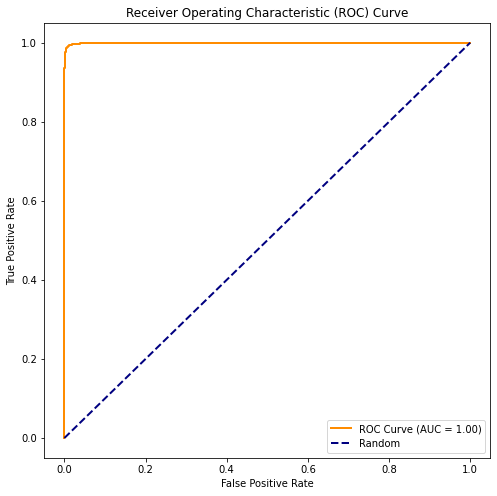

Learning rate set to 0.05777
0:	learn: 0.6166839	total: 9.73ms	remaining: 9.72s
1:	learn: 0.5562085	total: 19.6ms	remaining: 9.78s
2:	learn: 0.5045902	total: 28.3ms	remaining: 9.42s
3:	learn: 0.4619478	total: 37.3ms	remaining: 9.29s
4:	learn: 0.4195603	total: 46.5ms	remaining: 9.25s
5:	learn: 0.3785049	total: 55.7ms	remaining: 9.23s
6:	learn: 0.3552884	total: 64.5ms	remaining: 9.15s
7:	learn: 0.3257057	total: 73.5ms	remaining: 9.11s
8:	learn: 0.3031296	total: 82.5ms	remaining: 9.08s
9:	learn: 0.2846630	total: 92.6ms	remaining: 9.16s
10:	learn: 0.2658923	total: 102ms	remaining: 9.17s
11:	learn: 0.2483731	total: 112ms	remaining: 9.21s
12:	learn: 0.2342954	total: 121ms	remaining: 9.19s
13:	learn: 0.2214959	total: 131ms	remaining: 9.23s
14:	learn: 0.2088154	total: 141ms	remaining: 9.27s
15:	learn: 0.2006229	total: 151ms	remaining: 9.29s
16:	learn: 0.1919055	total: 161ms	remaining: 9.28s
17:	learn: 0.1864502	total: 170ms	remaining: 9.26s
18:	learn: 0.1813274	total: 180ms	remaining: 9.28s
19

173:	learn: 0.0363996	total: 1.71s	remaining: 8.11s
174:	learn: 0.0362209	total: 1.72s	remaining: 8.1s
175:	learn: 0.0359722	total: 1.73s	remaining: 8.09s
176:	learn: 0.0358625	total: 1.74s	remaining: 8.08s
177:	learn: 0.0357892	total: 1.75s	remaining: 8.07s
178:	learn: 0.0357110	total: 1.76s	remaining: 8.07s
179:	learn: 0.0356082	total: 1.77s	remaining: 8.06s
180:	learn: 0.0354155	total: 1.78s	remaining: 8.05s
181:	learn: 0.0353449	total: 1.79s	remaining: 8.04s
182:	learn: 0.0352689	total: 1.8s	remaining: 8.03s
183:	learn: 0.0352056	total: 1.81s	remaining: 8.02s
184:	learn: 0.0350219	total: 1.82s	remaining: 8.01s
185:	learn: 0.0348734	total: 1.83s	remaining: 8s
186:	learn: 0.0346808	total: 1.84s	remaining: 7.99s
187:	learn: 0.0345316	total: 1.85s	remaining: 7.97s
188:	learn: 0.0344166	total: 1.85s	remaining: 7.96s
189:	learn: 0.0342199	total: 1.86s	remaining: 7.94s
190:	learn: 0.0341566	total: 1.87s	remaining: 7.93s
191:	learn: 0.0340987	total: 1.88s	remaining: 7.91s
192:	learn: 0.034

348:	learn: 0.0247488	total: 3.39s	remaining: 6.32s
349:	learn: 0.0246908	total: 3.4s	remaining: 6.31s
350:	learn: 0.0246633	total: 3.41s	remaining: 6.3s
351:	learn: 0.0246282	total: 3.42s	remaining: 6.29s
352:	learn: 0.0246083	total: 3.43s	remaining: 6.28s
353:	learn: 0.0245744	total: 3.44s	remaining: 6.28s
354:	learn: 0.0245607	total: 3.45s	remaining: 6.27s
355:	learn: 0.0245272	total: 3.46s	remaining: 6.26s
356:	learn: 0.0244537	total: 3.47s	remaining: 6.25s
357:	learn: 0.0244229	total: 3.48s	remaining: 6.24s
358:	learn: 0.0243808	total: 3.49s	remaining: 6.24s
359:	learn: 0.0243508	total: 3.5s	remaining: 6.23s
360:	learn: 0.0243155	total: 3.51s	remaining: 6.22s
361:	learn: 0.0242965	total: 3.52s	remaining: 6.21s
362:	learn: 0.0242233	total: 3.53s	remaining: 6.2s
363:	learn: 0.0241969	total: 3.54s	remaining: 6.19s
364:	learn: 0.0241598	total: 3.55s	remaining: 6.17s
365:	learn: 0.0241393	total: 3.56s	remaining: 6.17s
366:	learn: 0.0241218	total: 3.57s	remaining: 6.15s
367:	learn: 0.02

514:	learn: 0.0202574	total: 5.02s	remaining: 4.73s
515:	learn: 0.0202574	total: 5.03s	remaining: 4.72s
516:	learn: 0.0202264	total: 5.04s	remaining: 4.71s
517:	learn: 0.0202249	total: 5.05s	remaining: 4.7s
518:	learn: 0.0202249	total: 5.06s	remaining: 4.69s
519:	learn: 0.0202114	total: 5.07s	remaining: 4.68s
520:	learn: 0.0201774	total: 5.08s	remaining: 4.67s
521:	learn: 0.0201562	total: 5.09s	remaining: 4.66s
522:	learn: 0.0201354	total: 5.1s	remaining: 4.65s
523:	learn: 0.0201354	total: 5.11s	remaining: 4.64s
524:	learn: 0.0201135	total: 5.12s	remaining: 4.63s
525:	learn: 0.0201011	total: 5.13s	remaining: 4.63s
526:	learn: 0.0200853	total: 5.14s	remaining: 4.62s
527:	learn: 0.0200648	total: 5.15s	remaining: 4.61s
528:	learn: 0.0200499	total: 5.16s	remaining: 4.59s
529:	learn: 0.0200372	total: 5.17s	remaining: 4.58s
530:	learn: 0.0199762	total: 5.18s	remaining: 4.58s
531:	learn: 0.0199703	total: 5.19s	remaining: 4.57s
532:	learn: 0.0199506	total: 5.2s	remaining: 4.55s
533:	learn: 0.0

681:	learn: 0.0178555	total: 6.7s	remaining: 3.12s
682:	learn: 0.0178378	total: 6.71s	remaining: 3.12s
683:	learn: 0.0177950	total: 6.73s	remaining: 3.11s
684:	learn: 0.0177802	total: 6.74s	remaining: 3.1s
685:	learn: 0.0177803	total: 6.75s	remaining: 3.09s
686:	learn: 0.0177728	total: 6.76s	remaining: 3.08s
687:	learn: 0.0177626	total: 6.77s	remaining: 3.07s
688:	learn: 0.0177564	total: 6.79s	remaining: 3.06s
689:	learn: 0.0177384	total: 6.8s	remaining: 3.05s
690:	learn: 0.0177286	total: 6.81s	remaining: 3.04s
691:	learn: 0.0177221	total: 6.82s	remaining: 3.03s
692:	learn: 0.0176962	total: 6.83s	remaining: 3.02s
693:	learn: 0.0176543	total: 6.84s	remaining: 3.02s
694:	learn: 0.0176235	total: 6.85s	remaining: 3s
695:	learn: 0.0176049	total: 6.86s	remaining: 3s
696:	learn: 0.0175847	total: 6.87s	remaining: 2.98s
697:	learn: 0.0175702	total: 6.88s	remaining: 2.98s
698:	learn: 0.0175555	total: 6.89s	remaining: 2.97s
699:	learn: 0.0175380	total: 6.9s	remaining: 2.96s
700:	learn: 0.0175380	

840:	learn: 0.0162511	total: 8.61s	remaining: 1.63s
841:	learn: 0.0162511	total: 8.62s	remaining: 1.62s
842:	learn: 0.0162511	total: 8.63s	remaining: 1.61s
843:	learn: 0.0162510	total: 8.64s	remaining: 1.6s
844:	learn: 0.0162510	total: 8.65s	remaining: 1.59s
845:	learn: 0.0162509	total: 8.65s	remaining: 1.57s
846:	learn: 0.0162462	total: 8.66s	remaining: 1.56s
847:	learn: 0.0162156	total: 8.68s	remaining: 1.55s
848:	learn: 0.0162055	total: 8.69s	remaining: 1.54s
849:	learn: 0.0161765	total: 8.7s	remaining: 1.53s
850:	learn: 0.0161687	total: 8.71s	remaining: 1.52s
851:	learn: 0.0161589	total: 8.72s	remaining: 1.51s
852:	learn: 0.0161302	total: 8.73s	remaining: 1.5s
853:	learn: 0.0161001	total: 8.74s	remaining: 1.49s
854:	learn: 0.0160821	total: 8.75s	remaining: 1.48s
855:	learn: 0.0160570	total: 8.76s	remaining: 1.47s
856:	learn: 0.0160570	total: 8.77s	remaining: 1.46s
857:	learn: 0.0160460	total: 8.77s	remaining: 1.45s
858:	learn: 0.0160232	total: 8.78s	remaining: 1.44s
859:	learn: 0.0

0:	learn: 0.6093815	total: 11.2ms	remaining: 11.2s
1:	learn: 0.5381415	total: 22.1ms	remaining: 11s
2:	learn: 0.4885377	total: 33.1ms	remaining: 11s
3:	learn: 0.4458878	total: 44.5ms	remaining: 11.1s
4:	learn: 0.4127126	total: 55.8ms	remaining: 11.1s
5:	learn: 0.3844150	total: 70.8ms	remaining: 11.7s
6:	learn: 0.3486823	total: 83.2ms	remaining: 11.8s
7:	learn: 0.3228380	total: 94ms	remaining: 11.7s
8:	learn: 0.2996816	total: 106ms	remaining: 11.7s
9:	learn: 0.2846089	total: 120ms	remaining: 11.9s
10:	learn: 0.2681182	total: 136ms	remaining: 12.3s
11:	learn: 0.2483672	total: 153ms	remaining: 12.6s
12:	learn: 0.2375871	total: 167ms	remaining: 12.7s
13:	learn: 0.2253717	total: 180ms	remaining: 12.7s
14:	learn: 0.2163309	total: 193ms	remaining: 12.7s
15:	learn: 0.2067408	total: 203ms	remaining: 12.5s
16:	learn: 0.1973939	total: 213ms	remaining: 12.3s
17:	learn: 0.1849358	total: 227ms	remaining: 12.4s
18:	learn: 0.1768311	total: 244ms	remaining: 12.6s
19:	learn: 0.1700034	total: 261ms	remai

163:	learn: 0.0368171	total: 1.9s	remaining: 9.69s
164:	learn: 0.0367010	total: 1.91s	remaining: 9.68s
165:	learn: 0.0365422	total: 1.92s	remaining: 9.67s
166:	learn: 0.0364629	total: 1.94s	remaining: 9.65s
167:	learn: 0.0363722	total: 1.95s	remaining: 9.64s
168:	learn: 0.0362724	total: 1.96s	remaining: 9.62s
169:	learn: 0.0362402	total: 1.97s	remaining: 9.61s
170:	learn: 0.0361498	total: 1.98s	remaining: 9.6s
171:	learn: 0.0360754	total: 1.99s	remaining: 9.58s
172:	learn: 0.0360180	total: 2s	remaining: 9.56s
173:	learn: 0.0359597	total: 2.01s	remaining: 9.54s
174:	learn: 0.0359298	total: 2.02s	remaining: 9.53s
175:	learn: 0.0357958	total: 2.03s	remaining: 9.51s
176:	learn: 0.0357479	total: 2.04s	remaining: 9.48s
177:	learn: 0.0356206	total: 2.05s	remaining: 9.46s
178:	learn: 0.0355495	total: 2.06s	remaining: 9.44s
179:	learn: 0.0354755	total: 2.07s	remaining: 9.42s
180:	learn: 0.0354218	total: 2.08s	remaining: 9.4s
181:	learn: 0.0353528	total: 2.09s	remaining: 9.38s
182:	learn: 0.0353

322:	learn: 0.0255231	total: 3.61s	remaining: 7.57s
323:	learn: 0.0254918	total: 3.63s	remaining: 7.57s
324:	learn: 0.0254572	total: 3.64s	remaining: 7.56s
325:	learn: 0.0254030	total: 3.65s	remaining: 7.55s
326:	learn: 0.0253768	total: 3.66s	remaining: 7.54s
327:	learn: 0.0253426	total: 3.71s	remaining: 7.6s
328:	learn: 0.0253208	total: 3.72s	remaining: 7.59s
329:	learn: 0.0252230	total: 3.73s	remaining: 7.58s
330:	learn: 0.0252208	total: 3.74s	remaining: 7.57s
331:	learn: 0.0251919	total: 3.75s	remaining: 7.55s
332:	learn: 0.0251661	total: 3.76s	remaining: 7.54s
333:	learn: 0.0250724	total: 3.77s	remaining: 7.53s
334:	learn: 0.0250535	total: 3.78s	remaining: 7.51s
335:	learn: 0.0249876	total: 3.79s	remaining: 7.5s
336:	learn: 0.0249434	total: 3.8s	remaining: 7.48s
337:	learn: 0.0249366	total: 3.81s	remaining: 7.47s
338:	learn: 0.0248741	total: 3.83s	remaining: 7.46s
339:	learn: 0.0248194	total: 3.84s	remaining: 7.46s
340:	learn: 0.0247855	total: 3.85s	remaining: 7.45s
341:	learn: 0.0

481:	learn: 0.0204405	total: 5.5s	remaining: 5.91s
482:	learn: 0.0204204	total: 5.52s	remaining: 5.91s
483:	learn: 0.0204012	total: 5.53s	remaining: 5.9s
484:	learn: 0.0203874	total: 5.54s	remaining: 5.89s
485:	learn: 0.0203855	total: 5.56s	remaining: 5.88s
486:	learn: 0.0203333	total: 5.57s	remaining: 5.87s
487:	learn: 0.0203021	total: 5.58s	remaining: 5.86s
488:	learn: 0.0202605	total: 5.6s	remaining: 5.85s
489:	learn: 0.0202477	total: 5.62s	remaining: 5.84s
490:	learn: 0.0202203	total: 5.63s	remaining: 5.83s
491:	learn: 0.0202202	total: 5.63s	remaining: 5.82s
492:	learn: 0.0202185	total: 5.65s	remaining: 5.81s
493:	learn: 0.0202112	total: 5.67s	remaining: 5.8s
494:	learn: 0.0202070	total: 5.68s	remaining: 5.8s
495:	learn: 0.0201529	total: 5.71s	remaining: 5.8s
496:	learn: 0.0201352	total: 5.72s	remaining: 5.79s
497:	learn: 0.0201221	total: 5.74s	remaining: 5.78s
498:	learn: 0.0201042	total: 5.76s	remaining: 5.78s
499:	learn: 0.0200431	total: 5.77s	remaining: 5.77s
500:	learn: 0.0200

646:	learn: 0.0176160	total: 7.41s	remaining: 4.04s
647:	learn: 0.0175871	total: 7.43s	remaining: 4.03s
648:	learn: 0.0175719	total: 7.44s	remaining: 4.02s
649:	learn: 0.0175599	total: 7.45s	remaining: 4.01s
650:	learn: 0.0175599	total: 7.46s	remaining: 4s
651:	learn: 0.0175486	total: 7.47s	remaining: 3.99s
652:	learn: 0.0175353	total: 7.49s	remaining: 3.98s
653:	learn: 0.0175229	total: 7.5s	remaining: 3.97s
654:	learn: 0.0175229	total: 7.51s	remaining: 3.95s
655:	learn: 0.0175229	total: 7.51s	remaining: 3.94s
656:	learn: 0.0175124	total: 7.53s	remaining: 3.93s
657:	learn: 0.0174766	total: 7.54s	remaining: 3.92s
658:	learn: 0.0174766	total: 7.55s	remaining: 3.9s
659:	learn: 0.0174598	total: 7.56s	remaining: 3.89s
660:	learn: 0.0174494	total: 7.57s	remaining: 3.88s
661:	learn: 0.0173882	total: 7.58s	remaining: 3.87s
662:	learn: 0.0173882	total: 7.59s	remaining: 3.86s
663:	learn: 0.0173800	total: 7.6s	remaining: 3.85s
664:	learn: 0.0173800	total: 7.61s	remaining: 3.83s
665:	learn: 0.0173

824:	learn: 0.0164862	total: 9.1s	remaining: 1.93s
825:	learn: 0.0164862	total: 9.11s	remaining: 1.92s
826:	learn: 0.0164862	total: 9.12s	remaining: 1.91s
827:	learn: 0.0164862	total: 9.13s	remaining: 1.9s
828:	learn: 0.0164862	total: 9.14s	remaining: 1.89s
829:	learn: 0.0164862	total: 9.15s	remaining: 1.87s
830:	learn: 0.0164862	total: 9.16s	remaining: 1.86s
831:	learn: 0.0164862	total: 9.17s	remaining: 1.85s
832:	learn: 0.0164862	total: 9.18s	remaining: 1.84s
833:	learn: 0.0164861	total: 9.19s	remaining: 1.83s
834:	learn: 0.0164861	total: 9.2s	remaining: 1.82s
835:	learn: 0.0164861	total: 9.21s	remaining: 1.8s
836:	learn: 0.0164861	total: 9.21s	remaining: 1.79s
837:	learn: 0.0164861	total: 9.22s	remaining: 1.78s
838:	learn: 0.0164861	total: 9.23s	remaining: 1.77s
839:	learn: 0.0164861	total: 9.24s	remaining: 1.76s
840:	learn: 0.0164743	total: 9.25s	remaining: 1.75s
841:	learn: 0.0164743	total: 9.26s	remaining: 1.74s
842:	learn: 0.0164743	total: 9.27s	remaining: 1.73s
843:	learn: 0.01

995:	learn: 0.0160535	total: 10.8s	remaining: 43.3ms
996:	learn: 0.0160534	total: 10.8s	remaining: 32.5ms
997:	learn: 0.0160534	total: 10.8s	remaining: 21.7ms
998:	learn: 0.0160534	total: 10.8s	remaining: 10.8ms
999:	learn: 0.0160534	total: 10.8s	remaining: 0us
Learning rate set to 0.05777
0:	learn: 0.6098086	total: 11.5ms	remaining: 11.5s
1:	learn: 0.5399003	total: 21.7ms	remaining: 10.8s
2:	learn: 0.4894013	total: 31.9ms	remaining: 10.6s
3:	learn: 0.4460445	total: 43.5ms	remaining: 10.8s
4:	learn: 0.4130332	total: 55.8ms	remaining: 11.1s
5:	learn: 0.3857459	total: 68ms	remaining: 11.3s
6:	learn: 0.3551680	total: 79.2ms	remaining: 11.2s
7:	learn: 0.3211805	total: 90.5ms	remaining: 11.2s
8:	learn: 0.2944569	total: 101ms	remaining: 11.2s
9:	learn: 0.2721843	total: 114ms	remaining: 11.2s
10:	learn: 0.2561544	total: 126ms	remaining: 11.3s
11:	learn: 0.2441862	total: 137ms	remaining: 11.3s
12:	learn: 0.2297118	total: 147ms	remaining: 11.1s
13:	learn: 0.2173475	total: 157ms	remaining: 11s
1

170:	learn: 0.0358825	total: 2s	remaining: 9.72s
171:	learn: 0.0357117	total: 2.02s	remaining: 9.75s
172:	learn: 0.0356504	total: 2.04s	remaining: 9.74s
173:	learn: 0.0355394	total: 2.05s	remaining: 9.74s
174:	learn: 0.0352670	total: 2.06s	remaining: 9.74s
175:	learn: 0.0350955	total: 2.08s	remaining: 9.73s
176:	learn: 0.0350377	total: 2.09s	remaining: 9.73s
177:	learn: 0.0347830	total: 2.11s	remaining: 9.73s
178:	learn: 0.0346690	total: 2.12s	remaining: 9.73s
179:	learn: 0.0345249	total: 2.13s	remaining: 9.72s
180:	learn: 0.0344023	total: 2.15s	remaining: 9.72s
181:	learn: 0.0343592	total: 2.16s	remaining: 9.71s
182:	learn: 0.0343139	total: 2.17s	remaining: 9.71s
183:	learn: 0.0341465	total: 2.19s	remaining: 9.69s
184:	learn: 0.0339850	total: 2.2s	remaining: 9.69s
185:	learn: 0.0338192	total: 2.21s	remaining: 9.69s
186:	learn: 0.0336899	total: 2.23s	remaining: 9.7s
187:	learn: 0.0335813	total: 2.24s	remaining: 9.69s
188:	learn: 0.0334854	total: 2.25s	remaining: 9.67s
189:	learn: 0.033

341:	learn: 0.0248095	total: 4.09s	remaining: 7.87s
342:	learn: 0.0246966	total: 4.1s	remaining: 7.86s
343:	learn: 0.0246640	total: 4.11s	remaining: 7.84s
344:	learn: 0.0246152	total: 4.13s	remaining: 7.84s
345:	learn: 0.0245991	total: 4.15s	remaining: 7.85s
346:	learn: 0.0245549	total: 4.17s	remaining: 7.85s
347:	learn: 0.0245347	total: 4.19s	remaining: 7.85s
348:	learn: 0.0244469	total: 4.2s	remaining: 7.83s
349:	learn: 0.0244291	total: 4.21s	remaining: 7.83s
350:	learn: 0.0243537	total: 4.23s	remaining: 7.83s
351:	learn: 0.0243162	total: 4.25s	remaining: 7.82s
352:	learn: 0.0242685	total: 4.26s	remaining: 7.81s
353:	learn: 0.0242136	total: 4.27s	remaining: 7.79s
354:	learn: 0.0241965	total: 4.28s	remaining: 7.78s
355:	learn: 0.0241509	total: 4.3s	remaining: 7.78s
356:	learn: 0.0241352	total: 4.32s	remaining: 7.77s
357:	learn: 0.0241150	total: 4.33s	remaining: 7.77s
358:	learn: 0.0240739	total: 4.35s	remaining: 7.77s
359:	learn: 0.0240147	total: 4.36s	remaining: 7.76s
360:	learn: 0.0

511:	learn: 0.0195656	total: 6.44s	remaining: 6.14s
512:	learn: 0.0195436	total: 6.45s	remaining: 6.12s
513:	learn: 0.0195238	total: 6.46s	remaining: 6.11s
514:	learn: 0.0194851	total: 6.48s	remaining: 6.1s
515:	learn: 0.0194763	total: 6.49s	remaining: 6.09s
516:	learn: 0.0194682	total: 6.5s	remaining: 6.08s
517:	learn: 0.0194239	total: 6.51s	remaining: 6.06s
518:	learn: 0.0194116	total: 6.53s	remaining: 6.05s
519:	learn: 0.0193778	total: 6.54s	remaining: 6.03s
520:	learn: 0.0193644	total: 6.55s	remaining: 6.02s
521:	learn: 0.0193608	total: 6.56s	remaining: 6s
522:	learn: 0.0193164	total: 6.57s	remaining: 5.99s
523:	learn: 0.0192968	total: 6.58s	remaining: 5.98s
524:	learn: 0.0192671	total: 6.59s	remaining: 5.96s
525:	learn: 0.0192671	total: 6.6s	remaining: 5.94s
526:	learn: 0.0192671	total: 6.6s	remaining: 5.93s
527:	learn: 0.0192604	total: 6.62s	remaining: 5.91s
528:	learn: 0.0192604	total: 6.62s	remaining: 5.9s
529:	learn: 0.0192604	total: 6.63s	remaining: 5.88s
530:	learn: 0.019247

689:	learn: 0.0175368	total: 8.35s	remaining: 3.75s
690:	learn: 0.0174793	total: 8.36s	remaining: 3.74s
691:	learn: 0.0174624	total: 8.37s	remaining: 3.73s
692:	learn: 0.0174624	total: 8.38s	remaining: 3.71s
693:	learn: 0.0174624	total: 8.39s	remaining: 3.7s
694:	learn: 0.0174484	total: 8.41s	remaining: 3.69s
695:	learn: 0.0174484	total: 8.42s	remaining: 3.68s
696:	learn: 0.0174405	total: 8.43s	remaining: 3.67s
697:	learn: 0.0174405	total: 8.44s	remaining: 3.65s
698:	learn: 0.0174312	total: 8.46s	remaining: 3.64s
699:	learn: 0.0174282	total: 8.47s	remaining: 3.63s
700:	learn: 0.0174199	total: 8.48s	remaining: 3.62s
701:	learn: 0.0174149	total: 8.49s	remaining: 3.6s
702:	learn: 0.0174149	total: 8.5s	remaining: 3.59s
703:	learn: 0.0174048	total: 8.51s	remaining: 3.58s
704:	learn: 0.0174048	total: 8.52s	remaining: 3.56s
705:	learn: 0.0173658	total: 8.53s	remaining: 3.55s
706:	learn: 0.0173658	total: 8.54s	remaining: 3.54s
707:	learn: 0.0173658	total: 8.55s	remaining: 3.53s
708:	learn: 0.0

860:	learn: 0.0167551	total: 10.2s	remaining: 1.65s
861:	learn: 0.0167551	total: 10.2s	remaining: 1.64s
862:	learn: 0.0167115	total: 10.2s	remaining: 1.62s
863:	learn: 0.0167115	total: 10.2s	remaining: 1.61s
864:	learn: 0.0167115	total: 10.2s	remaining: 1.6s
865:	learn: 0.0167114	total: 10.3s	remaining: 1.59s
866:	learn: 0.0167114	total: 10.3s	remaining: 1.57s
867:	learn: 0.0167114	total: 10.3s	remaining: 1.56s
868:	learn: 0.0167114	total: 10.3s	remaining: 1.55s
869:	learn: 0.0167114	total: 10.3s	remaining: 1.54s
870:	learn: 0.0167114	total: 10.3s	remaining: 1.52s
871:	learn: 0.0167114	total: 10.3s	remaining: 1.51s
872:	learn: 0.0167113	total: 10.3s	remaining: 1.5s
873:	learn: 0.0167113	total: 10.3s	remaining: 1.49s
874:	learn: 0.0167113	total: 10.3s	remaining: 1.48s
875:	learn: 0.0167113	total: 10.3s	remaining: 1.47s
876:	learn: 0.0167113	total: 10.4s	remaining: 1.45s
877:	learn: 0.0167113	total: 10.4s	remaining: 1.44s
878:	learn: 0.0167077	total: 10.4s	remaining: 1.43s
879:	learn: 0.

23:	learn: 0.1460222	total: 414ms	remaining: 16.9s
24:	learn: 0.1413440	total: 430ms	remaining: 16.8s
25:	learn: 0.1357834	total: 446ms	remaining: 16.7s
26:	learn: 0.1330844	total: 459ms	remaining: 16.5s
27:	learn: 0.1292482	total: 472ms	remaining: 16.4s
28:	learn: 0.1254226	total: 484ms	remaining: 16.2s
29:	learn: 0.1214069	total: 499ms	remaining: 16.1s
30:	learn: 0.1186090	total: 516ms	remaining: 16.1s
31:	learn: 0.1166728	total: 537ms	remaining: 16.2s
32:	learn: 0.1142488	total: 558ms	remaining: 16.4s
33:	learn: 0.1121958	total: 577ms	remaining: 16.4s
34:	learn: 0.1093153	total: 598ms	remaining: 16.5s
35:	learn: 0.1074064	total: 615ms	remaining: 16.5s
36:	learn: 0.1047558	total: 632ms	remaining: 16.4s
37:	learn: 0.1029963	total: 645ms	remaining: 16.3s
38:	learn: 0.1017300	total: 662ms	remaining: 16.3s
39:	learn: 0.0999175	total: 680ms	remaining: 16.3s
40:	learn: 0.0975389	total: 695ms	remaining: 16.3s
41:	learn: 0.0959205	total: 708ms	remaining: 16.1s
42:	learn: 0.0943942	total: 720

184:	learn: 0.0338832	total: 2.76s	remaining: 12.2s
185:	learn: 0.0337778	total: 2.77s	remaining: 12.1s
186:	learn: 0.0336399	total: 2.79s	remaining: 12.1s
187:	learn: 0.0335871	total: 2.8s	remaining: 12.1s
188:	learn: 0.0335308	total: 2.81s	remaining: 12.1s
189:	learn: 0.0334328	total: 2.82s	remaining: 12s
190:	learn: 0.0333866	total: 2.83s	remaining: 12s
191:	learn: 0.0333471	total: 2.84s	remaining: 12s
192:	learn: 0.0331870	total: 2.85s	remaining: 11.9s
193:	learn: 0.0331238	total: 2.86s	remaining: 11.9s
194:	learn: 0.0330913	total: 2.88s	remaining: 11.9s
195:	learn: 0.0329020	total: 2.88s	remaining: 11.8s
196:	learn: 0.0327913	total: 2.9s	remaining: 11.8s
197:	learn: 0.0327133	total: 2.91s	remaining: 11.8s
198:	learn: 0.0326172	total: 2.92s	remaining: 11.7s
199:	learn: 0.0325282	total: 2.93s	remaining: 11.7s
200:	learn: 0.0324512	total: 2.94s	remaining: 11.7s
201:	learn: 0.0324138	total: 2.95s	remaining: 11.7s
202:	learn: 0.0321881	total: 2.96s	remaining: 11.6s
203:	learn: 0.032097

354:	learn: 0.0237119	total: 4.86s	remaining: 8.84s
355:	learn: 0.0236937	total: 4.88s	remaining: 8.82s
356:	learn: 0.0236798	total: 4.89s	remaining: 8.8s
357:	learn: 0.0236554	total: 4.9s	remaining: 8.79s
358:	learn: 0.0236010	total: 4.91s	remaining: 8.77s
359:	learn: 0.0235651	total: 4.92s	remaining: 8.76s
360:	learn: 0.0235481	total: 4.94s	remaining: 8.74s
361:	learn: 0.0235145	total: 4.95s	remaining: 8.72s
362:	learn: 0.0234832	total: 4.96s	remaining: 8.7s
363:	learn: 0.0234330	total: 4.97s	remaining: 8.69s
364:	learn: 0.0234100	total: 4.98s	remaining: 8.67s
365:	learn: 0.0233612	total: 4.99s	remaining: 8.65s
366:	learn: 0.0233086	total: 5s	remaining: 8.63s
367:	learn: 0.0232621	total: 5.02s	remaining: 8.62s
368:	learn: 0.0231730	total: 5.03s	remaining: 8.6s
369:	learn: 0.0231498	total: 5.04s	remaining: 8.57s
370:	learn: 0.0231354	total: 5.05s	remaining: 8.55s
371:	learn: 0.0230803	total: 5.06s	remaining: 8.54s
372:	learn: 0.0230686	total: 5.07s	remaining: 8.52s
373:	learn: 0.02299

524:	learn: 0.0189413	total: 6.71s	remaining: 6.08s
525:	learn: 0.0189352	total: 6.73s	remaining: 6.06s
526:	learn: 0.0189277	total: 6.74s	remaining: 6.05s
527:	learn: 0.0189151	total: 6.75s	remaining: 6.04s
528:	learn: 0.0188705	total: 6.76s	remaining: 6.02s
529:	learn: 0.0188644	total: 6.77s	remaining: 6.01s
530:	learn: 0.0188331	total: 6.79s	remaining: 5.99s
531:	learn: 0.0188254	total: 6.8s	remaining: 5.98s
532:	learn: 0.0188120	total: 6.81s	remaining: 5.97s
533:	learn: 0.0187626	total: 6.82s	remaining: 5.95s
534:	learn: 0.0187540	total: 6.83s	remaining: 5.94s
535:	learn: 0.0187425	total: 6.84s	remaining: 5.93s
536:	learn: 0.0186929	total: 6.86s	remaining: 5.91s
537:	learn: 0.0186744	total: 6.87s	remaining: 5.9s
538:	learn: 0.0186525	total: 6.88s	remaining: 5.88s
539:	learn: 0.0186193	total: 6.89s	remaining: 5.87s
540:	learn: 0.0186065	total: 6.9s	remaining: 5.85s
541:	learn: 0.0185914	total: 6.91s	remaining: 5.84s
542:	learn: 0.0185752	total: 6.92s	remaining: 5.82s
543:	learn: 0.0

698:	learn: 0.0171260	total: 8.41s	remaining: 3.62s
699:	learn: 0.0171260	total: 8.42s	remaining: 3.61s
700:	learn: 0.0171260	total: 8.43s	remaining: 3.59s
701:	learn: 0.0171260	total: 8.43s	remaining: 3.58s
702:	learn: 0.0171260	total: 8.44s	remaining: 3.57s
703:	learn: 0.0171260	total: 8.45s	remaining: 3.55s
704:	learn: 0.0171260	total: 8.46s	remaining: 3.54s
705:	learn: 0.0171259	total: 8.47s	remaining: 3.53s
706:	learn: 0.0171258	total: 8.48s	remaining: 3.51s
707:	learn: 0.0171258	total: 8.49s	remaining: 3.5s
708:	learn: 0.0171258	total: 8.5s	remaining: 3.49s
709:	learn: 0.0171258	total: 8.51s	remaining: 3.48s
710:	learn: 0.0171258	total: 8.52s	remaining: 3.46s
711:	learn: 0.0171258	total: 8.53s	remaining: 3.45s
712:	learn: 0.0171258	total: 8.54s	remaining: 3.44s
713:	learn: 0.0171257	total: 8.54s	remaining: 3.42s
714:	learn: 0.0171256	total: 8.55s	remaining: 3.41s
715:	learn: 0.0171256	total: 8.56s	remaining: 3.4s
716:	learn: 0.0171256	total: 8.57s	remaining: 3.38s
717:	learn: 0.0

866:	learn: 0.0169451	total: 9.9s	remaining: 1.52s
867:	learn: 0.0169451	total: 9.91s	remaining: 1.51s
868:	learn: 0.0169450	total: 9.92s	remaining: 1.5s
869:	learn: 0.0169450	total: 9.93s	remaining: 1.48s
870:	learn: 0.0169450	total: 9.94s	remaining: 1.47s
871:	learn: 0.0169450	total: 9.94s	remaining: 1.46s
872:	learn: 0.0169450	total: 9.95s	remaining: 1.45s
873:	learn: 0.0169450	total: 9.96s	remaining: 1.44s
874:	learn: 0.0169450	total: 9.97s	remaining: 1.42s
875:	learn: 0.0169450	total: 9.98s	remaining: 1.41s
876:	learn: 0.0169450	total: 9.99s	remaining: 1.4s
877:	learn: 0.0169449	total: 10s	remaining: 1.39s
878:	learn: 0.0169449	total: 10s	remaining: 1.38s
879:	learn: 0.0169449	total: 10s	remaining: 1.36s
880:	learn: 0.0169449	total: 10s	remaining: 1.35s
881:	learn: 0.0169449	total: 10s	remaining: 1.34s
882:	learn: 0.0169449	total: 10s	remaining: 1.33s
883:	learn: 0.0169449	total: 10s	remaining: 1.32s
884:	learn: 0.0169359	total: 10.1s	remaining: 1.31s
885:	learn: 0.0169359	total: 

35:	learn: 0.1084888	total: 457ms	remaining: 12.2s
36:	learn: 0.1065681	total: 471ms	remaining: 12.3s
37:	learn: 0.1042623	total: 486ms	remaining: 12.3s
38:	learn: 0.1023313	total: 499ms	remaining: 12.3s
39:	learn: 0.1010274	total: 511ms	remaining: 12.3s
40:	learn: 0.0998787	total: 523ms	remaining: 12.2s
41:	learn: 0.0975151	total: 540ms	remaining: 12.3s
42:	learn: 0.0958813	total: 568ms	remaining: 12.6s
43:	learn: 0.0933297	total: 590ms	remaining: 12.8s
44:	learn: 0.0922811	total: 612ms	remaining: 13s
45:	learn: 0.0912452	total: 636ms	remaining: 13.2s
46:	learn: 0.0897684	total: 654ms	remaining: 13.3s
47:	learn: 0.0876341	total: 674ms	remaining: 13.4s
48:	learn: 0.0862131	total: 691ms	remaining: 13.4s
49:	learn: 0.0844108	total: 706ms	remaining: 13.4s
50:	learn: 0.0834287	total: 719ms	remaining: 13.4s
51:	learn: 0.0818718	total: 735ms	remaining: 13.4s
52:	learn: 0.0808773	total: 750ms	remaining: 13.4s
53:	learn: 0.0798994	total: 765ms	remaining: 13.4s
54:	learn: 0.0783261	total: 779ms

195:	learn: 0.0331268	total: 2.59s	remaining: 10.6s
196:	learn: 0.0330840	total: 2.61s	remaining: 10.6s
197:	learn: 0.0329770	total: 2.62s	remaining: 10.6s
198:	learn: 0.0329214	total: 2.64s	remaining: 10.6s
199:	learn: 0.0328417	total: 2.65s	remaining: 10.6s
200:	learn: 0.0327565	total: 2.67s	remaining: 10.6s
201:	learn: 0.0326065	total: 2.69s	remaining: 10.6s
202:	learn: 0.0324550	total: 2.7s	remaining: 10.6s
203:	learn: 0.0324211	total: 2.72s	remaining: 10.6s
204:	learn: 0.0322834	total: 2.73s	remaining: 10.6s
205:	learn: 0.0321977	total: 2.75s	remaining: 10.6s
206:	learn: 0.0320845	total: 2.76s	remaining: 10.6s
207:	learn: 0.0320247	total: 2.77s	remaining: 10.6s
208:	learn: 0.0319001	total: 2.78s	remaining: 10.5s
209:	learn: 0.0318160	total: 2.8s	remaining: 10.5s
210:	learn: 0.0316106	total: 2.81s	remaining: 10.5s
211:	learn: 0.0315624	total: 2.82s	remaining: 10.5s
212:	learn: 0.0315006	total: 2.83s	remaining: 10.5s
213:	learn: 0.0314559	total: 2.85s	remaining: 10.5s
214:	learn: 0.

364:	learn: 0.0233806	total: 4.49s	remaining: 7.82s
365:	learn: 0.0233647	total: 4.5s	remaining: 7.8s
366:	learn: 0.0233466	total: 4.51s	remaining: 7.79s
367:	learn: 0.0233158	total: 4.52s	remaining: 7.77s
368:	learn: 0.0232807	total: 4.53s	remaining: 7.75s
369:	learn: 0.0232511	total: 4.54s	remaining: 7.74s
370:	learn: 0.0232400	total: 4.55s	remaining: 7.72s
371:	learn: 0.0231952	total: 4.56s	remaining: 7.71s
372:	learn: 0.0231624	total: 4.57s	remaining: 7.69s
373:	learn: 0.0231330	total: 4.58s	remaining: 7.67s
374:	learn: 0.0230989	total: 4.59s	remaining: 7.66s
375:	learn: 0.0230568	total: 4.61s	remaining: 7.64s
376:	learn: 0.0230390	total: 4.62s	remaining: 7.63s
377:	learn: 0.0230212	total: 4.63s	remaining: 7.61s
378:	learn: 0.0230060	total: 4.64s	remaining: 7.6s
379:	learn: 0.0228956	total: 4.65s	remaining: 7.58s
380:	learn: 0.0228684	total: 4.66s	remaining: 7.57s
381:	learn: 0.0228346	total: 4.67s	remaining: 7.55s
382:	learn: 0.0228229	total: 4.68s	remaining: 7.54s
383:	learn: 0.0

534:	learn: 0.0190962	total: 6.38s	remaining: 5.55s
535:	learn: 0.0190962	total: 6.39s	remaining: 5.53s
536:	learn: 0.0190962	total: 6.4s	remaining: 5.52s
537:	learn: 0.0190700	total: 6.41s	remaining: 5.5s
538:	learn: 0.0190318	total: 6.42s	remaining: 5.49s
539:	learn: 0.0189974	total: 6.43s	remaining: 5.48s
540:	learn: 0.0189737	total: 6.44s	remaining: 5.46s
541:	learn: 0.0189506	total: 6.45s	remaining: 5.45s
542:	learn: 0.0189324	total: 6.46s	remaining: 5.44s
543:	learn: 0.0189259	total: 6.47s	remaining: 5.43s
544:	learn: 0.0189013	total: 6.48s	remaining: 5.41s
545:	learn: 0.0188782	total: 6.5s	remaining: 5.4s
546:	learn: 0.0188614	total: 6.51s	remaining: 5.39s
547:	learn: 0.0188414	total: 6.52s	remaining: 5.38s
548:	learn: 0.0188115	total: 6.53s	remaining: 5.37s
549:	learn: 0.0187796	total: 6.54s	remaining: 5.35s
550:	learn: 0.0187686	total: 6.55s	remaining: 5.34s
551:	learn: 0.0187209	total: 6.56s	remaining: 5.33s
552:	learn: 0.0187058	total: 6.57s	remaining: 5.31s
553:	learn: 0.01

706:	learn: 0.0170300	total: 8.04s	remaining: 3.33s
707:	learn: 0.0170300	total: 8.05s	remaining: 3.32s
708:	learn: 0.0170299	total: 8.06s	remaining: 3.31s
709:	learn: 0.0170299	total: 8.07s	remaining: 3.29s
710:	learn: 0.0170299	total: 8.07s	remaining: 3.28s
711:	learn: 0.0170299	total: 8.08s	remaining: 3.27s
712:	learn: 0.0170144	total: 8.09s	remaining: 3.26s
713:	learn: 0.0170143	total: 8.1s	remaining: 3.25s
714:	learn: 0.0170143	total: 8.11s	remaining: 3.23s
715:	learn: 0.0170143	total: 8.12s	remaining: 3.22s
716:	learn: 0.0170143	total: 8.13s	remaining: 3.21s
717:	learn: 0.0170143	total: 8.14s	remaining: 3.2s
718:	learn: 0.0170143	total: 8.15s	remaining: 3.19s
719:	learn: 0.0170012	total: 8.16s	remaining: 3.17s
720:	learn: 0.0170012	total: 8.17s	remaining: 3.16s
721:	learn: 0.0170012	total: 8.18s	remaining: 3.15s
722:	learn: 0.0170012	total: 8.19s	remaining: 3.14s
723:	learn: 0.0170012	total: 8.2s	remaining: 3.12s
724:	learn: 0.0170011	total: 8.21s	remaining: 3.11s
725:	learn: 0.0

882:	learn: 0.0163121	total: 9.53s	remaining: 1.26s
883:	learn: 0.0163121	total: 9.53s	remaining: 1.25s
884:	learn: 0.0162938	total: 9.54s	remaining: 1.24s
885:	learn: 0.0162711	total: 9.56s	remaining: 1.23s
886:	learn: 0.0162711	total: 9.56s	remaining: 1.22s
887:	learn: 0.0162324	total: 9.57s	remaining: 1.21s
888:	learn: 0.0162183	total: 9.59s	remaining: 1.2s
889:	learn: 0.0162183	total: 9.59s	remaining: 1.19s
890:	learn: 0.0162063	total: 9.6s	remaining: 1.17s
891:	learn: 0.0162062	total: 9.61s	remaining: 1.16s
892:	learn: 0.0162062	total: 9.62s	remaining: 1.15s
893:	learn: 0.0161982	total: 9.63s	remaining: 1.14s
894:	learn: 0.0161982	total: 9.64s	remaining: 1.13s
895:	learn: 0.0161744	total: 9.65s	remaining: 1.12s
896:	learn: 0.0161744	total: 9.65s	remaining: 1.11s
897:	learn: 0.0161625	total: 9.66s	remaining: 1.1s
898:	learn: 0.0161625	total: 9.67s	remaining: 1.09s
899:	learn: 0.0161625	total: 9.68s	remaining: 1.07s
900:	learn: 0.0161625	total: 9.69s	remaining: 1.06s
901:	learn: 0.0

58:	learn: 0.0785962	total: 614ms	remaining: 9.8s
59:	learn: 0.0776264	total: 628ms	remaining: 9.84s
60:	learn: 0.0770842	total: 640ms	remaining: 9.85s
61:	learn: 0.0756426	total: 653ms	remaining: 9.88s
62:	learn: 0.0750521	total: 664ms	remaining: 9.88s
63:	learn: 0.0742925	total: 674ms	remaining: 9.86s
64:	learn: 0.0727134	total: 685ms	remaining: 9.86s
65:	learn: 0.0720674	total: 696ms	remaining: 9.85s
66:	learn: 0.0711039	total: 707ms	remaining: 9.84s
67:	learn: 0.0701938	total: 717ms	remaining: 9.83s
68:	learn: 0.0695664	total: 727ms	remaining: 9.81s
69:	learn: 0.0684946	total: 737ms	remaining: 9.79s
70:	learn: 0.0681428	total: 747ms	remaining: 9.78s
71:	learn: 0.0671824	total: 757ms	remaining: 9.76s
72:	learn: 0.0663800	total: 767ms	remaining: 9.74s
73:	learn: 0.0660268	total: 777ms	remaining: 9.73s
74:	learn: 0.0656784	total: 787ms	remaining: 9.71s
75:	learn: 0.0648713	total: 798ms	remaining: 9.7s
76:	learn: 0.0641792	total: 810ms	remaining: 9.71s
77:	learn: 0.0635894	total: 822ms

230:	learn: 0.0307994	total: 2.52s	remaining: 8.39s
231:	learn: 0.0306570	total: 2.53s	remaining: 8.38s
232:	learn: 0.0306014	total: 2.54s	remaining: 8.37s
233:	learn: 0.0305529	total: 2.55s	remaining: 8.36s
234:	learn: 0.0304604	total: 2.57s	remaining: 8.36s
235:	learn: 0.0303058	total: 2.58s	remaining: 8.35s
236:	learn: 0.0302625	total: 2.59s	remaining: 8.34s
237:	learn: 0.0301881	total: 2.6s	remaining: 8.33s
238:	learn: 0.0300933	total: 2.61s	remaining: 8.32s
239:	learn: 0.0300286	total: 2.62s	remaining: 8.31s
240:	learn: 0.0299693	total: 2.63s	remaining: 8.3s
241:	learn: 0.0299036	total: 2.64s	remaining: 8.28s
242:	learn: 0.0297327	total: 2.65s	remaining: 8.27s
243:	learn: 0.0296959	total: 2.66s	remaining: 8.26s
244:	learn: 0.0296454	total: 2.67s	remaining: 8.24s
245:	learn: 0.0296049	total: 2.69s	remaining: 8.23s
246:	learn: 0.0295067	total: 2.7s	remaining: 8.22s
247:	learn: 0.0294539	total: 2.71s	remaining: 8.21s
248:	learn: 0.0293420	total: 2.72s	remaining: 8.21s
249:	learn: 0.0

398:	learn: 0.0231435	total: 4.43s	remaining: 6.67s
399:	learn: 0.0231362	total: 4.44s	remaining: 6.66s
400:	learn: 0.0231168	total: 4.45s	remaining: 6.64s
401:	learn: 0.0231000	total: 4.46s	remaining: 6.63s
402:	learn: 0.0230035	total: 4.47s	remaining: 6.63s
403:	learn: 0.0229896	total: 4.49s	remaining: 6.62s
404:	learn: 0.0229365	total: 4.5s	remaining: 6.61s
405:	learn: 0.0229130	total: 4.51s	remaining: 6.6s
406:	learn: 0.0228804	total: 4.52s	remaining: 6.59s
407:	learn: 0.0227950	total: 4.53s	remaining: 6.58s
408:	learn: 0.0227858	total: 4.54s	remaining: 6.57s
409:	learn: 0.0227393	total: 4.55s	remaining: 6.55s
410:	learn: 0.0226757	total: 4.57s	remaining: 6.54s
411:	learn: 0.0226569	total: 4.58s	remaining: 6.53s
412:	learn: 0.0225956	total: 4.59s	remaining: 6.52s
413:	learn: 0.0225795	total: 4.6s	remaining: 6.51s
414:	learn: 0.0225657	total: 4.61s	remaining: 6.5s
415:	learn: 0.0225363	total: 4.62s	remaining: 6.49s
416:	learn: 0.0225202	total: 4.63s	remaining: 6.48s
417:	learn: 0.02

566:	learn: 0.0195017	total: 6.13s	remaining: 4.68s
567:	learn: 0.0194694	total: 6.14s	remaining: 4.67s
568:	learn: 0.0194474	total: 6.15s	remaining: 4.66s
569:	learn: 0.0194058	total: 6.16s	remaining: 4.64s
570:	learn: 0.0193890	total: 6.17s	remaining: 4.64s
571:	learn: 0.0193828	total: 6.18s	remaining: 4.63s
572:	learn: 0.0193828	total: 6.2s	remaining: 4.62s
573:	learn: 0.0193724	total: 6.21s	remaining: 4.61s
574:	learn: 0.0193245	total: 6.22s	remaining: 4.6s
575:	learn: 0.0193017	total: 6.23s	remaining: 4.59s
576:	learn: 0.0192924	total: 6.24s	remaining: 4.58s
577:	learn: 0.0192801	total: 6.25s	remaining: 4.56s
578:	learn: 0.0192236	total: 6.26s	remaining: 4.55s
579:	learn: 0.0191981	total: 6.28s	remaining: 4.54s
580:	learn: 0.0191881	total: 6.29s	remaining: 4.53s
581:	learn: 0.0191815	total: 6.3s	remaining: 4.53s
582:	learn: 0.0191737	total: 6.31s	remaining: 4.51s
583:	learn: 0.0191209	total: 6.33s	remaining: 4.5s
584:	learn: 0.0191100	total: 6.34s	remaining: 4.5s
585:	learn: 0.019

738:	learn: 0.0170430	total: 7.99s	remaining: 2.82s
739:	learn: 0.0170196	total: 8s	remaining: 2.81s
740:	learn: 0.0169732	total: 8.01s	remaining: 2.8s
741:	learn: 0.0169352	total: 8.02s	remaining: 2.79s
742:	learn: 0.0169228	total: 8.04s	remaining: 2.78s
743:	learn: 0.0169080	total: 8.05s	remaining: 2.77s
744:	learn: 0.0168928	total: 8.06s	remaining: 2.76s
745:	learn: 0.0168800	total: 8.07s	remaining: 2.75s
746:	learn: 0.0168799	total: 8.08s	remaining: 2.74s
747:	learn: 0.0168730	total: 8.09s	remaining: 2.73s
748:	learn: 0.0168639	total: 8.1s	remaining: 2.71s
749:	learn: 0.0168519	total: 8.11s	remaining: 2.7s
750:	learn: 0.0168436	total: 8.12s	remaining: 2.69s
751:	learn: 0.0168372	total: 8.13s	remaining: 2.68s
752:	learn: 0.0168229	total: 8.15s	remaining: 2.67s
753:	learn: 0.0168228	total: 8.16s	remaining: 2.66s
754:	learn: 0.0168228	total: 8.17s	remaining: 2.65s
755:	learn: 0.0168126	total: 8.18s	remaining: 2.64s
756:	learn: 0.0167984	total: 8.2s	remaining: 2.63s
757:	learn: 0.01679

908:	learn: 0.0158318	total: 9.67s	remaining: 968ms
909:	learn: 0.0158193	total: 9.68s	remaining: 957ms
910:	learn: 0.0158193	total: 9.69s	remaining: 946ms
911:	learn: 0.0158193	total: 9.7s	remaining: 936ms
912:	learn: 0.0158192	total: 9.71s	remaining: 925ms
913:	learn: 0.0158066	total: 9.72s	remaining: 914ms
914:	learn: 0.0158066	total: 9.73s	remaining: 904ms
915:	learn: 0.0158065	total: 9.74s	remaining: 893ms
916:	learn: 0.0158065	total: 9.75s	remaining: 882ms
917:	learn: 0.0157884	total: 9.76s	remaining: 872ms
918:	learn: 0.0157791	total: 9.77s	remaining: 861ms
919:	learn: 0.0157791	total: 9.78s	remaining: 850ms
920:	learn: 0.0157791	total: 9.79s	remaining: 839ms
921:	learn: 0.0157790	total: 9.79s	remaining: 828ms
922:	learn: 0.0157790	total: 9.8s	remaining: 818ms
923:	learn: 0.0157790	total: 9.81s	remaining: 807ms
924:	learn: 0.0157790	total: 9.82s	remaining: 796ms
925:	learn: 0.0157790	total: 9.82s	remaining: 785ms
926:	learn: 0.0157790	total: 9.83s	remaining: 774ms
927:	learn: 0.

77:	learn: 0.0603968	total: 844ms	remaining: 9.97s
78:	learn: 0.0596468	total: 854ms	remaining: 9.96s
79:	learn: 0.0592681	total: 865ms	remaining: 9.94s
80:	learn: 0.0588857	total: 875ms	remaining: 9.93s
81:	learn: 0.0585168	total: 886ms	remaining: 9.92s
82:	learn: 0.0579529	total: 896ms	remaining: 9.9s
83:	learn: 0.0576394	total: 907ms	remaining: 9.89s
84:	learn: 0.0567848	total: 918ms	remaining: 9.88s
85:	learn: 0.0564518	total: 929ms	remaining: 9.87s
86:	learn: 0.0562511	total: 939ms	remaining: 9.86s
87:	learn: 0.0555877	total: 951ms	remaining: 9.86s
88:	learn: 0.0551767	total: 962ms	remaining: 9.85s
89:	learn: 0.0547867	total: 972ms	remaining: 9.83s
90:	learn: 0.0542244	total: 985ms	remaining: 9.83s
91:	learn: 0.0539471	total: 998ms	remaining: 9.85s
92:	learn: 0.0534003	total: 1.01s	remaining: 9.85s
93:	learn: 0.0526305	total: 1.02s	remaining: 9.87s
94:	learn: 0.0524414	total: 1.04s	remaining: 9.88s
95:	learn: 0.0518778	total: 1.05s	remaining: 9.88s
96:	learn: 0.0516487	total: 1.06

248:	learn: 0.0295864	total: 2.76s	remaining: 8.31s
249:	learn: 0.0294104	total: 2.77s	remaining: 8.3s
250:	learn: 0.0293125	total: 2.78s	remaining: 8.29s
251:	learn: 0.0292795	total: 2.79s	remaining: 8.28s
252:	learn: 0.0292428	total: 2.8s	remaining: 8.28s
253:	learn: 0.0291506	total: 2.81s	remaining: 8.27s
254:	learn: 0.0290678	total: 2.83s	remaining: 8.27s
255:	learn: 0.0289707	total: 2.84s	remaining: 8.26s
256:	learn: 0.0288883	total: 2.85s	remaining: 8.25s
257:	learn: 0.0287775	total: 2.86s	remaining: 8.23s
258:	learn: 0.0287085	total: 2.87s	remaining: 8.22s
259:	learn: 0.0286535	total: 2.88s	remaining: 8.2s
260:	learn: 0.0285503	total: 2.89s	remaining: 8.19s
261:	learn: 0.0285030	total: 2.9s	remaining: 8.18s
262:	learn: 0.0284320	total: 2.91s	remaining: 8.16s
263:	learn: 0.0284018	total: 2.92s	remaining: 8.15s
264:	learn: 0.0283820	total: 2.94s	remaining: 8.14s
265:	learn: 0.0283292	total: 2.95s	remaining: 8.13s
266:	learn: 0.0282854	total: 2.96s	remaining: 8.12s
267:	learn: 0.02

410:	learn: 0.0224272	total: 4.62s	remaining: 6.62s
411:	learn: 0.0224171	total: 4.63s	remaining: 6.61s
412:	learn: 0.0224036	total: 4.64s	remaining: 6.6s
413:	learn: 0.0223735	total: 4.65s	remaining: 6.59s
414:	learn: 0.0223395	total: 4.66s	remaining: 6.58s
415:	learn: 0.0223109	total: 4.67s	remaining: 6.56s
416:	learn: 0.0222494	total: 4.68s	remaining: 6.55s
417:	learn: 0.0221927	total: 4.7s	remaining: 6.54s
418:	learn: 0.0221689	total: 4.71s	remaining: 6.53s
419:	learn: 0.0221205	total: 4.72s	remaining: 6.52s
420:	learn: 0.0221062	total: 4.73s	remaining: 6.51s
421:	learn: 0.0220795	total: 4.75s	remaining: 6.5s
422:	learn: 0.0220503	total: 4.76s	remaining: 6.49s
423:	learn: 0.0220242	total: 4.77s	remaining: 6.48s
424:	learn: 0.0219445	total: 4.78s	remaining: 6.47s
425:	learn: 0.0219055	total: 4.79s	remaining: 6.45s
426:	learn: 0.0219025	total: 4.8s	remaining: 6.44s
427:	learn: 0.0218845	total: 4.81s	remaining: 6.43s
428:	learn: 0.0218689	total: 4.82s	remaining: 6.41s
429:	learn: 0.02

585:	learn: 0.0183703	total: 6.53s	remaining: 4.62s
586:	learn: 0.0183486	total: 6.54s	remaining: 4.6s
587:	learn: 0.0183339	total: 6.55s	remaining: 4.59s
588:	learn: 0.0183046	total: 6.56s	remaining: 4.58s
589:	learn: 0.0182959	total: 6.57s	remaining: 4.57s
590:	learn: 0.0182790	total: 6.58s	remaining: 4.55s
591:	learn: 0.0182568	total: 6.59s	remaining: 4.54s
592:	learn: 0.0182469	total: 6.6s	remaining: 4.53s
593:	learn: 0.0182469	total: 6.61s	remaining: 4.52s
594:	learn: 0.0182402	total: 6.62s	remaining: 4.5s
595:	learn: 0.0182402	total: 6.63s	remaining: 4.49s
596:	learn: 0.0182401	total: 6.63s	remaining: 4.48s
597:	learn: 0.0182309	total: 6.64s	remaining: 4.46s
598:	learn: 0.0182309	total: 6.65s	remaining: 4.45s
599:	learn: 0.0182308	total: 6.66s	remaining: 4.44s
600:	learn: 0.0181545	total: 6.67s	remaining: 4.43s
601:	learn: 0.0181301	total: 6.68s	remaining: 4.41s
602:	learn: 0.0181301	total: 6.68s	remaining: 4.4s
603:	learn: 0.0181243	total: 6.69s	remaining: 4.39s
604:	learn: 0.01

758:	learn: 0.0167878	total: 8.2s	remaining: 2.6s
759:	learn: 0.0167878	total: 8.21s	remaining: 2.59s
760:	learn: 0.0167878	total: 8.22s	remaining: 2.58s
761:	learn: 0.0167824	total: 8.23s	remaining: 2.57s
762:	learn: 0.0167824	total: 8.24s	remaining: 2.56s
763:	learn: 0.0167823	total: 8.25s	remaining: 2.55s
764:	learn: 0.0167823	total: 8.26s	remaining: 2.54s
765:	learn: 0.0167607	total: 8.27s	remaining: 2.52s
766:	learn: 0.0167607	total: 8.27s	remaining: 2.51s
767:	learn: 0.0167607	total: 8.28s	remaining: 2.5s
768:	learn: 0.0167607	total: 8.29s	remaining: 2.49s
769:	learn: 0.0167607	total: 8.3s	remaining: 2.48s
770:	learn: 0.0167532	total: 8.31s	remaining: 2.47s
771:	learn: 0.0167532	total: 8.32s	remaining: 2.46s
772:	learn: 0.0167532	total: 8.33s	remaining: 2.45s
773:	learn: 0.0167532	total: 8.34s	remaining: 2.44s
774:	learn: 0.0167532	total: 8.35s	remaining: 2.42s
775:	learn: 0.0167532	total: 8.36s	remaining: 2.41s
776:	learn: 0.0167329	total: 8.38s	remaining: 2.4s
777:	learn: 0.016

934:	learn: 0.0163126	total: 9.87s	remaining: 686ms
935:	learn: 0.0163126	total: 9.89s	remaining: 676ms
936:	learn: 0.0162884	total: 9.9s	remaining: 666ms
937:	learn: 0.0162884	total: 9.91s	remaining: 655ms
938:	learn: 0.0162884	total: 9.93s	remaining: 645ms
939:	learn: 0.0162884	total: 9.94s	remaining: 634ms
940:	learn: 0.0162789	total: 9.95s	remaining: 624ms
941:	learn: 0.0162291	total: 9.96s	remaining: 613ms
942:	learn: 0.0162291	total: 9.97s	remaining: 603ms
943:	learn: 0.0162190	total: 9.98s	remaining: 592ms
944:	learn: 0.0162110	total: 9.99s	remaining: 582ms
945:	learn: 0.0161889	total: 10s	remaining: 571ms
946:	learn: 0.0161889	total: 10s	remaining: 561ms
947:	learn: 0.0161645	total: 10s	remaining: 550ms
948:	learn: 0.0161330	total: 10s	remaining: 540ms
949:	learn: 0.0161330	total: 10.1s	remaining: 529ms
950:	learn: 0.0161262	total: 10.1s	remaining: 519ms
951:	learn: 0.0161262	total: 10.1s	remaining: 508ms
952:	learn: 0.0161262	total: 10.1s	remaining: 498ms
953:	learn: 0.0161262

100:	learn: 0.0492431	total: 1.16s	remaining: 10.3s
101:	learn: 0.0489923	total: 1.18s	remaining: 10.4s
102:	learn: 0.0487547	total: 1.19s	remaining: 10.4s
103:	learn: 0.0484321	total: 1.2s	remaining: 10.3s
104:	learn: 0.0481040	total: 1.21s	remaining: 10.3s
105:	learn: 0.0479231	total: 1.22s	remaining: 10.3s
106:	learn: 0.0476051	total: 1.23s	remaining: 10.3s
107:	learn: 0.0472121	total: 1.24s	remaining: 10.3s
108:	learn: 0.0470663	total: 1.25s	remaining: 10.3s
109:	learn: 0.0469122	total: 1.26s	remaining: 10.2s
110:	learn: 0.0466981	total: 1.27s	remaining: 10.2s
111:	learn: 0.0464181	total: 1.28s	remaining: 10.2s
112:	learn: 0.0462605	total: 1.29s	remaining: 10.2s
113:	learn: 0.0461412	total: 1.3s	remaining: 10.1s
114:	learn: 0.0457837	total: 1.31s	remaining: 10.1s
115:	learn: 0.0455877	total: 1.33s	remaining: 10.1s
116:	learn: 0.0453982	total: 1.34s	remaining: 10.1s
117:	learn: 0.0450298	total: 1.35s	remaining: 10.1s
118:	learn: 0.0448401	total: 1.36s	remaining: 10.1s
119:	learn: 0.

269:	learn: 0.0278015	total: 3.04s	remaining: 8.23s
270:	learn: 0.0277459	total: 3.06s	remaining: 8.22s
271:	learn: 0.0277194	total: 3.06s	remaining: 8.2s
272:	learn: 0.0276836	total: 3.08s	remaining: 8.19s
273:	learn: 0.0276115	total: 3.08s	remaining: 8.18s
274:	learn: 0.0275538	total: 3.1s	remaining: 8.16s
275:	learn: 0.0275065	total: 3.11s	remaining: 8.15s
276:	learn: 0.0274858	total: 3.12s	remaining: 8.13s
277:	learn: 0.0273966	total: 3.13s	remaining: 8.12s
278:	learn: 0.0273160	total: 3.14s	remaining: 8.11s
279:	learn: 0.0272056	total: 3.15s	remaining: 8.1s
280:	learn: 0.0271405	total: 3.16s	remaining: 8.09s
281:	learn: 0.0271114	total: 3.17s	remaining: 8.07s
282:	learn: 0.0270732	total: 3.18s	remaining: 8.06s
283:	learn: 0.0270354	total: 3.19s	remaining: 8.05s
284:	learn: 0.0269666	total: 3.21s	remaining: 8.05s
285:	learn: 0.0269430	total: 3.23s	remaining: 8.05s
286:	learn: 0.0269131	total: 3.24s	remaining: 8.05s
287:	learn: 0.0268549	total: 3.26s	remaining: 8.05s
288:	learn: 0.0

429:	learn: 0.0216681	total: 4.94s	remaining: 6.55s
430:	learn: 0.0216481	total: 4.96s	remaining: 6.54s
431:	learn: 0.0216270	total: 4.97s	remaining: 6.53s
432:	learn: 0.0215823	total: 4.98s	remaining: 6.52s
433:	learn: 0.0215708	total: 4.99s	remaining: 6.51s
434:	learn: 0.0215337	total: 5s	remaining: 6.5s
435:	learn: 0.0214987	total: 5.01s	remaining: 6.49s
436:	learn: 0.0214620	total: 5.03s	remaining: 6.48s
437:	learn: 0.0214491	total: 5.04s	remaining: 6.46s
438:	learn: 0.0214363	total: 5.05s	remaining: 6.45s
439:	learn: 0.0214170	total: 5.06s	remaining: 6.44s
440:	learn: 0.0213899	total: 5.07s	remaining: 6.42s
441:	learn: 0.0213803	total: 5.08s	remaining: 6.41s
442:	learn: 0.0213803	total: 5.09s	remaining: 6.39s
443:	learn: 0.0213582	total: 5.1s	remaining: 6.38s
444:	learn: 0.0213398	total: 5.11s	remaining: 6.37s
445:	learn: 0.0213345	total: 5.12s	remaining: 6.36s
446:	learn: 0.0212936	total: 5.13s	remaining: 6.35s
447:	learn: 0.0212927	total: 5.15s	remaining: 6.34s
448:	learn: 0.021

606:	learn: 0.0180709	total: 6.85s	remaining: 4.43s
607:	learn: 0.0180709	total: 6.86s	remaining: 4.42s
608:	learn: 0.0180709	total: 6.87s	remaining: 4.41s
609:	learn: 0.0180571	total: 6.88s	remaining: 4.4s
610:	learn: 0.0180530	total: 6.89s	remaining: 4.39s
611:	learn: 0.0180530	total: 6.9s	remaining: 4.38s
612:	learn: 0.0180490	total: 6.91s	remaining: 4.36s
613:	learn: 0.0180490	total: 6.92s	remaining: 4.35s
614:	learn: 0.0180422	total: 6.93s	remaining: 4.34s
615:	learn: 0.0180422	total: 6.94s	remaining: 4.33s
616:	learn: 0.0180309	total: 6.95s	remaining: 4.31s
617:	learn: 0.0180309	total: 6.96s	remaining: 4.3s
618:	learn: 0.0180308	total: 6.96s	remaining: 4.29s
619:	learn: 0.0180308	total: 6.97s	remaining: 4.27s
620:	learn: 0.0179931	total: 6.98s	remaining: 4.26s
621:	learn: 0.0179654	total: 6.99s	remaining: 4.25s
622:	learn: 0.0179654	total: 7s	remaining: 4.24s
623:	learn: 0.0179610	total: 7.01s	remaining: 4.22s
624:	learn: 0.0179611	total: 7.02s	remaining: 4.21s
625:	learn: 0.0179

780:	learn: 0.0169452	total: 8.51s	remaining: 2.39s
781:	learn: 0.0169452	total: 8.52s	remaining: 2.38s
782:	learn: 0.0169451	total: 8.54s	remaining: 2.37s
783:	learn: 0.0169395	total: 8.55s	remaining: 2.35s
784:	learn: 0.0169395	total: 8.56s	remaining: 2.34s
785:	learn: 0.0169395	total: 8.56s	remaining: 2.33s
786:	learn: 0.0169356	total: 8.58s	remaining: 2.32s
787:	learn: 0.0169134	total: 8.59s	remaining: 2.31s
788:	learn: 0.0169134	total: 8.61s	remaining: 2.3s
789:	learn: 0.0169046	total: 8.62s	remaining: 2.29s
790:	learn: 0.0169046	total: 8.63s	remaining: 2.28s
791:	learn: 0.0169046	total: 8.63s	remaining: 2.27s
792:	learn: 0.0169046	total: 8.64s	remaining: 2.26s
793:	learn: 0.0169046	total: 8.69s	remaining: 2.25s
794:	learn: 0.0169045	total: 8.71s	remaining: 2.24s
795:	learn: 0.0168965	total: 8.72s	remaining: 2.23s
796:	learn: 0.0168965	total: 8.73s	remaining: 2.22s
797:	learn: 0.0168965	total: 8.73s	remaining: 2.21s
798:	learn: 0.0168964	total: 8.74s	remaining: 2.2s
799:	learn: 0.

947:	learn: 0.0165751	total: 9.98s	remaining: 548ms
948:	learn: 0.0165751	total: 9.99s	remaining: 537ms
949:	learn: 0.0165751	total: 10s	remaining: 526ms
950:	learn: 0.0165751	total: 10s	remaining: 516ms
951:	learn: 0.0165751	total: 10s	remaining: 505ms
952:	learn: 0.0165751	total: 10s	remaining: 494ms
953:	learn: 0.0165751	total: 10s	remaining: 483ms
954:	learn: 0.0165751	total: 10s	remaining: 473ms
955:	learn: 0.0165751	total: 10s	remaining: 462ms
956:	learn: 0.0165751	total: 10s	remaining: 452ms
957:	learn: 0.0165751	total: 10.1s	remaining: 441ms
958:	learn: 0.0165750	total: 10.1s	remaining: 430ms
959:	learn: 0.0165750	total: 10.1s	remaining: 420ms
960:	learn: 0.0165715	total: 10.1s	remaining: 409ms
961:	learn: 0.0165715	total: 10.1s	remaining: 398ms
962:	learn: 0.0165715	total: 10.1s	remaining: 388ms
963:	learn: 0.0165715	total: 10.1s	remaining: 377ms
964:	learn: 0.0165603	total: 10.1s	remaining: 367ms
965:	learn: 0.0165603	total: 10.1s	remaining: 356ms
966:	learn: 0.0165603	total:

117:	learn: 0.0451686	total: 1.28s	remaining: 9.55s
118:	learn: 0.0449507	total: 1.29s	remaining: 9.55s
119:	learn: 0.0446873	total: 1.3s	remaining: 9.53s
120:	learn: 0.0445433	total: 1.31s	remaining: 9.52s
121:	learn: 0.0441080	total: 1.32s	remaining: 9.5s
122:	learn: 0.0439386	total: 1.33s	remaining: 9.49s
123:	learn: 0.0437884	total: 1.34s	remaining: 9.48s
124:	learn: 0.0436312	total: 1.35s	remaining: 9.47s
125:	learn: 0.0433140	total: 1.36s	remaining: 9.46s
126:	learn: 0.0429314	total: 1.37s	remaining: 9.45s
127:	learn: 0.0428222	total: 1.39s	remaining: 9.44s
128:	learn: 0.0424030	total: 1.4s	remaining: 9.42s
129:	learn: 0.0421774	total: 1.41s	remaining: 9.41s
130:	learn: 0.0420729	total: 1.42s	remaining: 9.39s
131:	learn: 0.0419315	total: 1.43s	remaining: 9.38s
132:	learn: 0.0415764	total: 1.44s	remaining: 9.37s
133:	learn: 0.0413868	total: 1.45s	remaining: 9.36s
134:	learn: 0.0412311	total: 1.46s	remaining: 9.35s
135:	learn: 0.0408725	total: 1.47s	remaining: 9.33s
136:	learn: 0.0

284:	learn: 0.0269377	total: 3.19s	remaining: 8s
285:	learn: 0.0269075	total: 3.2s	remaining: 7.99s
286:	learn: 0.0268562	total: 3.21s	remaining: 7.98s
287:	learn: 0.0268466	total: 3.23s	remaining: 7.97s
288:	learn: 0.0268004	total: 3.24s	remaining: 7.97s
289:	learn: 0.0267569	total: 3.25s	remaining: 7.96s
290:	learn: 0.0266421	total: 3.26s	remaining: 7.95s
291:	learn: 0.0265715	total: 3.27s	remaining: 7.93s
292:	learn: 0.0264551	total: 3.28s	remaining: 7.92s
293:	learn: 0.0264133	total: 3.29s	remaining: 7.91s
294:	learn: 0.0263666	total: 3.3s	remaining: 7.89s
295:	learn: 0.0262930	total: 3.31s	remaining: 7.88s
296:	learn: 0.0262474	total: 3.32s	remaining: 7.87s
297:	learn: 0.0261907	total: 3.33s	remaining: 7.85s
298:	learn: 0.0261466	total: 3.34s	remaining: 7.84s
299:	learn: 0.0260393	total: 3.35s	remaining: 7.83s
300:	learn: 0.0259718	total: 3.36s	remaining: 7.81s
301:	learn: 0.0258593	total: 3.38s	remaining: 7.8s
302:	learn: 0.0258307	total: 3.38s	remaining: 7.79s
303:	learn: 0.0257

455:	learn: 0.0206912	total: 5.08s	remaining: 6.06s
456:	learn: 0.0206631	total: 5.09s	remaining: 6.05s
457:	learn: 0.0206397	total: 5.1s	remaining: 6.04s
458:	learn: 0.0205626	total: 5.11s	remaining: 6.03s
459:	learn: 0.0204926	total: 5.12s	remaining: 6.01s
460:	learn: 0.0204589	total: 5.13s	remaining: 6s
461:	learn: 0.0204514	total: 5.14s	remaining: 5.99s
462:	learn: 0.0204401	total: 5.15s	remaining: 5.98s
463:	learn: 0.0204230	total: 5.16s	remaining: 5.96s
464:	learn: 0.0204065	total: 5.17s	remaining: 5.95s
465:	learn: 0.0203968	total: 5.18s	remaining: 5.94s
466:	learn: 0.0203466	total: 5.19s	remaining: 5.93s
467:	learn: 0.0202944	total: 5.21s	remaining: 5.92s
468:	learn: 0.0202714	total: 5.22s	remaining: 5.91s
469:	learn: 0.0202324	total: 5.23s	remaining: 5.9s
470:	learn: 0.0202000	total: 5.24s	remaining: 5.89s
471:	learn: 0.0201934	total: 5.25s	remaining: 5.88s
472:	learn: 0.0201814	total: 5.26s	remaining: 5.87s
473:	learn: 0.0201653	total: 5.27s	remaining: 5.85s
474:	learn: 0.020

614:	learn: 0.0174798	total: 6.77s	remaining: 4.24s
615:	learn: 0.0174612	total: 6.78s	remaining: 4.23s
616:	learn: 0.0174555	total: 6.79s	remaining: 4.21s
617:	learn: 0.0174500	total: 6.8s	remaining: 4.2s
618:	learn: 0.0174357	total: 6.81s	remaining: 4.19s
619:	learn: 0.0174065	total: 6.82s	remaining: 4.18s
620:	learn: 0.0174064	total: 6.83s	remaining: 4.17s
621:	learn: 0.0173864	total: 6.84s	remaining: 4.16s
622:	learn: 0.0173741	total: 6.85s	remaining: 4.15s
623:	learn: 0.0173740	total: 6.86s	remaining: 4.13s
624:	learn: 0.0173740	total: 6.87s	remaining: 4.12s
625:	learn: 0.0173490	total: 6.88s	remaining: 4.11s
626:	learn: 0.0173067	total: 6.9s	remaining: 4.1s
627:	learn: 0.0173019	total: 6.91s	remaining: 4.09s
628:	learn: 0.0172730	total: 6.92s	remaining: 4.08s
629:	learn: 0.0172730	total: 6.93s	remaining: 4.07s
630:	learn: 0.0172730	total: 6.94s	remaining: 4.06s
631:	learn: 0.0172636	total: 6.95s	remaining: 4.05s
632:	learn: 0.0172636	total: 6.96s	remaining: 4.04s
633:	learn: 0.01

783:	learn: 0.0170768	total: 8.25s	remaining: 2.27s
784:	learn: 0.0170767	total: 8.26s	remaining: 2.26s
785:	learn: 0.0170767	total: 8.27s	remaining: 2.25s
786:	learn: 0.0170767	total: 8.27s	remaining: 2.24s
787:	learn: 0.0170767	total: 8.28s	remaining: 2.23s
788:	learn: 0.0170767	total: 8.29s	remaining: 2.22s
789:	learn: 0.0170767	total: 8.3s	remaining: 2.21s
790:	learn: 0.0170756	total: 8.31s	remaining: 2.19s
791:	learn: 0.0170756	total: 8.31s	remaining: 2.18s
792:	learn: 0.0170756	total: 8.32s	remaining: 2.17s
793:	learn: 0.0170756	total: 8.33s	remaining: 2.16s
794:	learn: 0.0170662	total: 8.34s	remaining: 2.15s
795:	learn: 0.0170528	total: 8.35s	remaining: 2.14s
796:	learn: 0.0170369	total: 8.36s	remaining: 2.13s
797:	learn: 0.0170369	total: 8.37s	remaining: 2.12s
798:	learn: 0.0170173	total: 8.38s	remaining: 2.11s
799:	learn: 0.0170173	total: 8.38s	remaining: 2.1s
800:	learn: 0.0170172	total: 8.39s	remaining: 2.08s
801:	learn: 0.0170172	total: 8.4s	remaining: 2.07s
802:	learn: 0.0

945:	learn: 0.0167720	total: 9.72s	remaining: 555ms
946:	learn: 0.0167720	total: 9.73s	remaining: 544ms
947:	learn: 0.0167720	total: 9.73s	remaining: 534ms
948:	learn: 0.0167720	total: 9.74s	remaining: 524ms
949:	learn: 0.0167720	total: 9.75s	remaining: 513ms
950:	learn: 0.0167539	total: 9.76s	remaining: 503ms
951:	learn: 0.0167539	total: 9.77s	remaining: 493ms
952:	learn: 0.0167539	total: 9.78s	remaining: 482ms
953:	learn: 0.0167539	total: 9.79s	remaining: 472ms
954:	learn: 0.0167538	total: 9.8s	remaining: 462ms
955:	learn: 0.0167537	total: 9.81s	remaining: 452ms
956:	learn: 0.0167537	total: 9.82s	remaining: 441ms
957:	learn: 0.0167536	total: 9.83s	remaining: 431ms
958:	learn: 0.0167536	total: 9.84s	remaining: 421ms
959:	learn: 0.0167536	total: 9.85s	remaining: 410ms
960:	learn: 0.0167536	total: 9.85s	remaining: 400ms
961:	learn: 0.0167536	total: 9.86s	remaining: 390ms
962:	learn: 0.0167535	total: 9.87s	remaining: 379ms
963:	learn: 0.0167535	total: 9.88s	remaining: 369ms
964:	learn: 0

113:	learn: 0.0463848	total: 1.34s	remaining: 10.4s
114:	learn: 0.0459919	total: 1.35s	remaining: 10.4s
115:	learn: 0.0458724	total: 1.36s	remaining: 10.4s
116:	learn: 0.0454792	total: 1.37s	remaining: 10.4s
117:	learn: 0.0452441	total: 1.39s	remaining: 10.4s
118:	learn: 0.0450078	total: 1.4s	remaining: 10.4s
119:	learn: 0.0448277	total: 1.42s	remaining: 10.4s
120:	learn: 0.0445224	total: 1.43s	remaining: 10.4s
121:	learn: 0.0443225	total: 1.44s	remaining: 10.4s
122:	learn: 0.0440897	total: 1.46s	remaining: 10.4s
123:	learn: 0.0439961	total: 1.47s	remaining: 10.4s
124:	learn: 0.0438890	total: 1.48s	remaining: 10.3s
125:	learn: 0.0435303	total: 1.49s	remaining: 10.3s
126:	learn: 0.0431970	total: 1.5s	remaining: 10.3s
127:	learn: 0.0427436	total: 1.51s	remaining: 10.3s
128:	learn: 0.0426416	total: 1.53s	remaining: 10.3s
129:	learn: 0.0423517	total: 1.54s	remaining: 10.3s
130:	learn: 0.0420692	total: 1.56s	remaining: 10.4s
131:	learn: 0.0418388	total: 1.58s	remaining: 10.4s
132:	learn: 0.

282:	learn: 0.0270831	total: 3.23s	remaining: 8.2s
283:	learn: 0.0270558	total: 3.25s	remaining: 8.18s
284:	learn: 0.0270241	total: 3.25s	remaining: 8.17s
285:	learn: 0.0269513	total: 3.27s	remaining: 8.15s
286:	learn: 0.0269279	total: 3.28s	remaining: 8.14s
287:	learn: 0.0268304	total: 3.29s	remaining: 8.13s
288:	learn: 0.0268033	total: 3.3s	remaining: 8.12s
289:	learn: 0.0267520	total: 3.31s	remaining: 8.12s
290:	learn: 0.0267311	total: 3.33s	remaining: 8.1s
291:	learn: 0.0267041	total: 3.33s	remaining: 8.09s
292:	learn: 0.0265435	total: 3.35s	remaining: 8.08s
293:	learn: 0.0264637	total: 3.36s	remaining: 8.06s
294:	learn: 0.0264335	total: 3.37s	remaining: 8.04s
295:	learn: 0.0263974	total: 3.38s	remaining: 8.03s
296:	learn: 0.0263655	total: 3.39s	remaining: 8.02s
297:	learn: 0.0263494	total: 3.4s	remaining: 8.01s
298:	learn: 0.0262877	total: 3.41s	remaining: 8s
299:	learn: 0.0262534	total: 3.42s	remaining: 7.99s
300:	learn: 0.0261846	total: 3.44s	remaining: 7.99s
301:	learn: 0.02616

450:	learn: 0.0208547	total: 5.16s	remaining: 6.29s
451:	learn: 0.0208317	total: 5.17s	remaining: 6.27s
452:	learn: 0.0208248	total: 5.19s	remaining: 6.26s
453:	learn: 0.0207782	total: 5.2s	remaining: 6.26s
454:	learn: 0.0207403	total: 5.21s	remaining: 6.25s
455:	learn: 0.0207330	total: 5.23s	remaining: 6.24s
456:	learn: 0.0207158	total: 5.24s	remaining: 6.23s
457:	learn: 0.0206984	total: 5.25s	remaining: 6.22s
458:	learn: 0.0206901	total: 5.27s	remaining: 6.21s
459:	learn: 0.0206678	total: 5.28s	remaining: 6.2s
460:	learn: 0.0206549	total: 5.29s	remaining: 6.19s
461:	learn: 0.0206500	total: 5.3s	remaining: 6.18s
462:	learn: 0.0206260	total: 5.32s	remaining: 6.17s
463:	learn: 0.0206107	total: 5.33s	remaining: 6.15s
464:	learn: 0.0205790	total: 5.34s	remaining: 6.14s
465:	learn: 0.0205789	total: 5.35s	remaining: 6.13s
466:	learn: 0.0205598	total: 5.36s	remaining: 6.12s
467:	learn: 0.0205299	total: 5.37s	remaining: 6.11s
468:	learn: 0.0204965	total: 5.39s	remaining: 6.1s
469:	learn: 0.02

619:	learn: 0.0175038	total: 7.08s	remaining: 4.34s
620:	learn: 0.0174950	total: 7.09s	remaining: 4.33s
621:	learn: 0.0174950	total: 7.1s	remaining: 4.32s
622:	learn: 0.0174817	total: 7.12s	remaining: 4.31s
623:	learn: 0.0174601	total: 7.13s	remaining: 4.3s
624:	learn: 0.0174601	total: 7.15s	remaining: 4.29s
625:	learn: 0.0174402	total: 7.16s	remaining: 4.28s
626:	learn: 0.0174354	total: 7.17s	remaining: 4.26s
627:	learn: 0.0174157	total: 7.18s	remaining: 4.25s
628:	learn: 0.0174157	total: 7.19s	remaining: 4.24s
629:	learn: 0.0174157	total: 7.2s	remaining: 4.23s
630:	learn: 0.0174157	total: 7.21s	remaining: 4.22s
631:	learn: 0.0174116	total: 7.22s	remaining: 4.2s
632:	learn: 0.0174116	total: 7.23s	remaining: 4.19s
633:	learn: 0.0173907	total: 7.24s	remaining: 4.18s
634:	learn: 0.0173862	total: 7.25s	remaining: 4.17s
635:	learn: 0.0173732	total: 7.26s	remaining: 4.16s
636:	learn: 0.0173732	total: 7.27s	remaining: 4.14s
637:	learn: 0.0173542	total: 7.28s	remaining: 4.13s
638:	learn: 0.01

798:	learn: 0.0167294	total: 8.76s	remaining: 2.2s
799:	learn: 0.0167294	total: 8.77s	remaining: 2.19s
800:	learn: 0.0167263	total: 8.78s	remaining: 2.18s
801:	learn: 0.0166866	total: 8.79s	remaining: 2.17s
802:	learn: 0.0166723	total: 8.8s	remaining: 2.16s
803:	learn: 0.0166722	total: 8.81s	remaining: 2.15s
804:	learn: 0.0166486	total: 8.83s	remaining: 2.14s
805:	learn: 0.0166486	total: 8.83s	remaining: 2.13s
806:	learn: 0.0166485	total: 8.84s	remaining: 2.11s
807:	learn: 0.0166279	total: 8.86s	remaining: 2.1s
808:	learn: 0.0166279	total: 8.87s	remaining: 2.09s
809:	learn: 0.0166279	total: 8.87s	remaining: 2.08s
810:	learn: 0.0166278	total: 8.88s	remaining: 2.07s
811:	learn: 0.0166278	total: 8.89s	remaining: 2.06s
812:	learn: 0.0166216	total: 8.9s	remaining: 2.05s
813:	learn: 0.0166216	total: 8.91s	remaining: 2.04s
814:	learn: 0.0166216	total: 8.92s	remaining: 2.02s
815:	learn: 0.0166216	total: 8.93s	remaining: 2.01s
816:	learn: 0.0166215	total: 8.94s	remaining: 2s
817:	learn: 0.01661

978:	learn: 0.0157632	total: 10.4s	remaining: 223ms
979:	learn: 0.0157290	total: 10.4s	remaining: 212ms
980:	learn: 0.0157290	total: 10.4s	remaining: 202ms
981:	learn: 0.0157290	total: 10.4s	remaining: 191ms
982:	learn: 0.0157290	total: 10.4s	remaining: 180ms
983:	learn: 0.0157290	total: 10.4s	remaining: 170ms
984:	learn: 0.0157290	total: 10.4s	remaining: 159ms
985:	learn: 0.0157290	total: 10.4s	remaining: 148ms
986:	learn: 0.0157289	total: 10.5s	remaining: 138ms
987:	learn: 0.0157289	total: 10.5s	remaining: 127ms
988:	learn: 0.0157289	total: 10.5s	remaining: 116ms
989:	learn: 0.0157289	total: 10.5s	remaining: 106ms
990:	learn: 0.0157207	total: 10.5s	remaining: 95.2ms
991:	learn: 0.0157207	total: 10.5s	remaining: 84.6ms
992:	learn: 0.0157207	total: 10.5s	remaining: 74ms
993:	learn: 0.0157207	total: 10.5s	remaining: 63.4ms
994:	learn: 0.0157207	total: 10.5s	remaining: 52.8ms
995:	learn: 0.0157206	total: 10.5s	remaining: 42.3ms
996:	learn: 0.0157206	total: 10.5s	remaining: 31.7ms
997:	le

In [40]:
run_model('CatBoostClassifier',CatBoostClassifier())

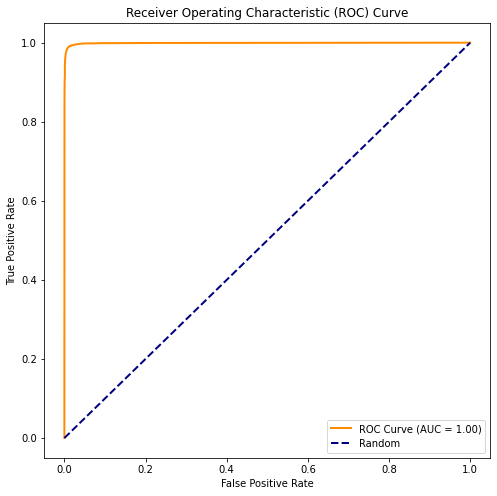

Random Forest
Model performance for Training set
- Accuracy : 1.0000
- F1_score : 1.0000
- Precision Score: 1.0000
- Recall Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9891
- F1_score: 0.9890
- Precision Score: 0.9873
- Recall Score: 0.9907
----------------------------------
Crossvalidate Score(mean): 0.9884
Crossvalidate Std: 0.0010


In [41]:
run_model('Random Forest',RandomForestClassifier()) 

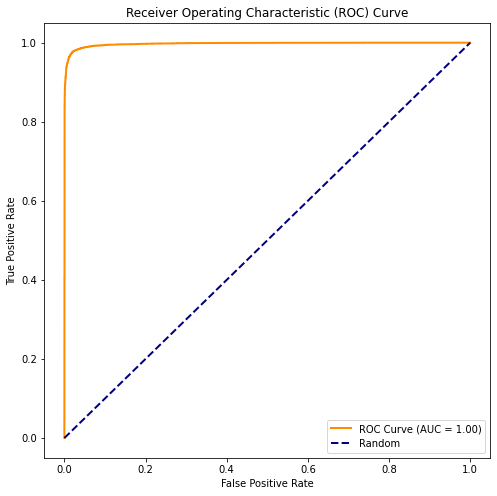

AdaBoost
Model performance for Training set
- Accuracy : 0.9764
- F1_score : 0.9763
- Precision Score: 0.9850
- Recall Score: 0.9677
----------------------------------
Model performance for Test set
- Accuracy: 0.9771
- F1_score: 0.9768
- Precision Score: 0.9850
- Recall Score: 0.9688
----------------------------------
Crossvalidate Score(mean): 0.9749
Crossvalidate Std: 0.0019


In [42]:
hyper_tuning('AdaBoost',AdaBoostClassifier())

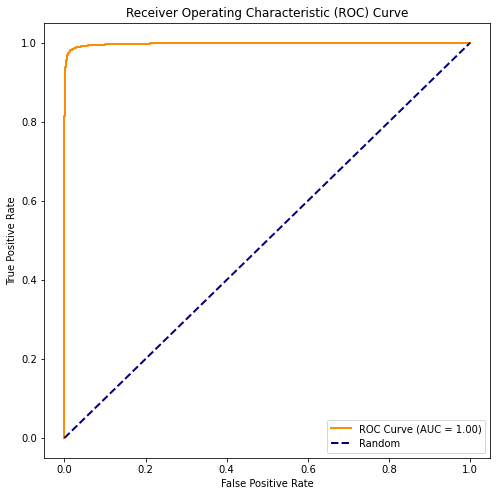

MLPClassifier
Model performance for Training set
- Accuracy : 0.9849
- F1_score : 0.9849
- Precision Score: 0.9879
- Recall Score: 0.9819
----------------------------------
Model performance for Test set
- Accuracy: 0.9827
- F1_score: 0.9825
- Precision Score: 0.9852
- Recall Score: 0.9799
----------------------------------
Crossvalidate Score(mean): 0.9825
Crossvalidate Std: 0.0011


In [43]:
run_model('MLPClassifier',MLPClassifier())

In [44]:
# RNN with LSTM layers
RNN_model = Sequential()
RNN_model.add(LSTM(100, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True))
RNN_model.add(LSTM(50, activation='relu', return_sequences=True))
RNN_model.add(LSTM(30, activation='relu'))

RNN_model.add(Dense(1, activation='sigmoid'))

RNN_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 100)            40800     
                                                                 
 lstm_1 (LSTM)               (None, 6, 50)             30200     
                                                                 
 lstm_2 (LSTM)               (None, 30)                9720      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 80751 (315.43 KB)
Trainable params: 80751 (315.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
RNN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [46]:
history = RNN_model.fit(X_train, y_train, batch_size=128, validation_split=0.2, epochs=30)

Epoch 1/30


443/443 [==============================] - 10s 14ms/step - loss: 0.3854 - accuracy: 0.8260 - val_loss: 0.2477 - val_accuracy: 0.8983
Epoch 2/30
443/443 [==============================] - 6s 14ms/step - loss: 0.1792 - accuracy: 0.9330 - val_loss: 0.1481 - val_accuracy: 0.9471
Epoch 3/30
443/443 [==============================] - 6s 14ms/step - loss: 0.1306 - accuracy: 0.9517 - val_loss: 0.1046 - val_accuracy: 0.9619
Epoch 4/30
443/443 [==============================] - 6s 13ms/step - loss: 0.1156 - accuracy: 0.9581 - val_loss: 0.1012 - val_accuracy: 0.9617
Epoch 5/30
443/443 [==============================] - 6s 13ms/step - loss: 0.0983 - accuracy: 0.9640 - val_loss: 0.1275 - val_accuracy: 0.9520
Epoch 6/30
443/443 [==============================] - 6s 13ms/step - loss: 0.0938 - accuracy: 0.9661 - val_loss: 0.0885 - val_accuracy: 0.9662
Epoch 7/30
443/443 [==============================] - 6s 14ms/step - loss: 0.0865 - accuracy: 0.9694 - val_loss: 0.0767 - val_accuracy: 0.9

In [47]:
score = RNN_model.evaluate(X_test,y_test,verbose=1)

print(f'RNN Test loss : {score[0]}')
print(f'RNN Training score : {100*score[1]}%')

554/554 [==============================] - 2s 3ms/step - loss: 0.0616 - accuracy: 0.9792
RNN Test loss : 0.06161079928278923
RNN Training score : 97.91737198829651%


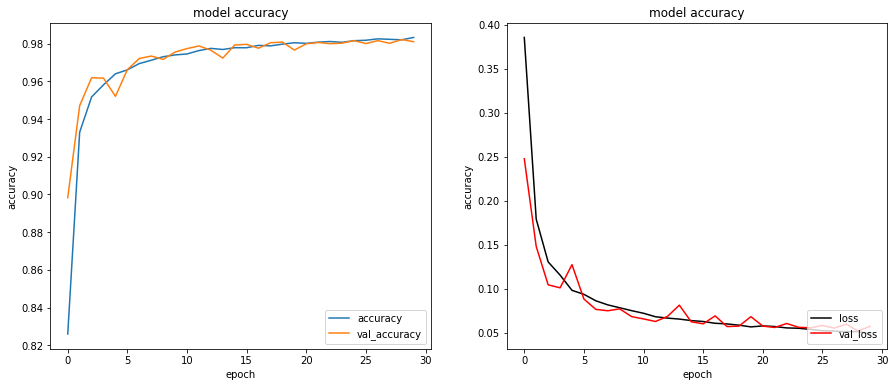

In [48]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label= 'val_accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
# plt.show()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='loss',color='k')
plt.plot(history.history['val_loss'], label= 'val_loss',color='r')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

In [49]:
pd.DataFrame(list(zip(model_list, accuracy_list_train,accuracy_list_test,f1_list_train,f1_list_test,roc_auc_list))\
             , columns=['Model Name', 'Accuracy_train','Accuracy_Test','F1_train','F1_test','roc_auc_score'])\
.sort_values(by=["F1_test",'roc_auc_score'],ascending=False)

,Model Name,Accuracy_train,Accuracy_Test,F1_train,F1_test,roc_auc_score
6,CatBoostClassifier,0.995217,0.991308,0.995226,0.991249,0.999465
4,LightGBMClassifier,0.993453,0.990123,0.993466,0.990063,0.999369
2,XGBClassifier,0.997587,0.989107,0.997593,0.989041,0.999313
7,Random Forest,1.000000,0.989051,1.000000,0.989002,0.998880
3,Decision Tree,0.995344,0.983407,0.995354,0.983311,0.988382
9,MLPClassifier,0.984916,0.982673,0.984923,0.982520,0.997847
5,GradientBoost,0.981177,0.980923,0.981118,0.980672,0.997474
8,AdaBoost,0.976393,0.977142,0.976267,0.976811,0.996994
1,KNN,0.976788,0.968450,0.976512,0.967592,0.988323
0,Logistic Regression,0.840285,0.843436,0.833174,0.834704,0.901065


####  *<ins>Insights</ins>*:

- Top Performers:

  - `CatBoostClassifier` and `LightGBMClassifier` remain top-performing traditional models, with consistently high scores across metrics.

  - Random Forest and XGBClassifier also perform well, but potential overfitting concerns persist.
- Overfitting:

  - Decision Tree continues to show significant overfitting, with nearly perfect training scores but lower test scores.
- RNN with LSTM:

  - Test loss of 0.0527 indicates reasonably good performance, but context is needed for a more definitive assessment.
  - Training score of 98.18% is high, but compare it to the test score to evaluate potential overfitting or underfitting.
- Other Models:

  - MLPClassifier, GradientBoost, AdaBoost, and KNN maintain consistent performance.
  - Logistic Regression remains the least effective model and is highly overfitting.